# Packages

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataframe
df = pd.read_csv("/Users/karmenmarkov/Library/CloudStorage/GoogleDrive-kkarmenmarkov@gmail.com/My Drive/masters_ppg/final_df_4_stages_stand.csv")


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

features = df.drop(columns=['4_stages'])  # Extract features excluding the label column 'PPG_GM','PPI_GM'

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)
features_imputed = pd.DataFrame(features_imputed, columns=features.columns)

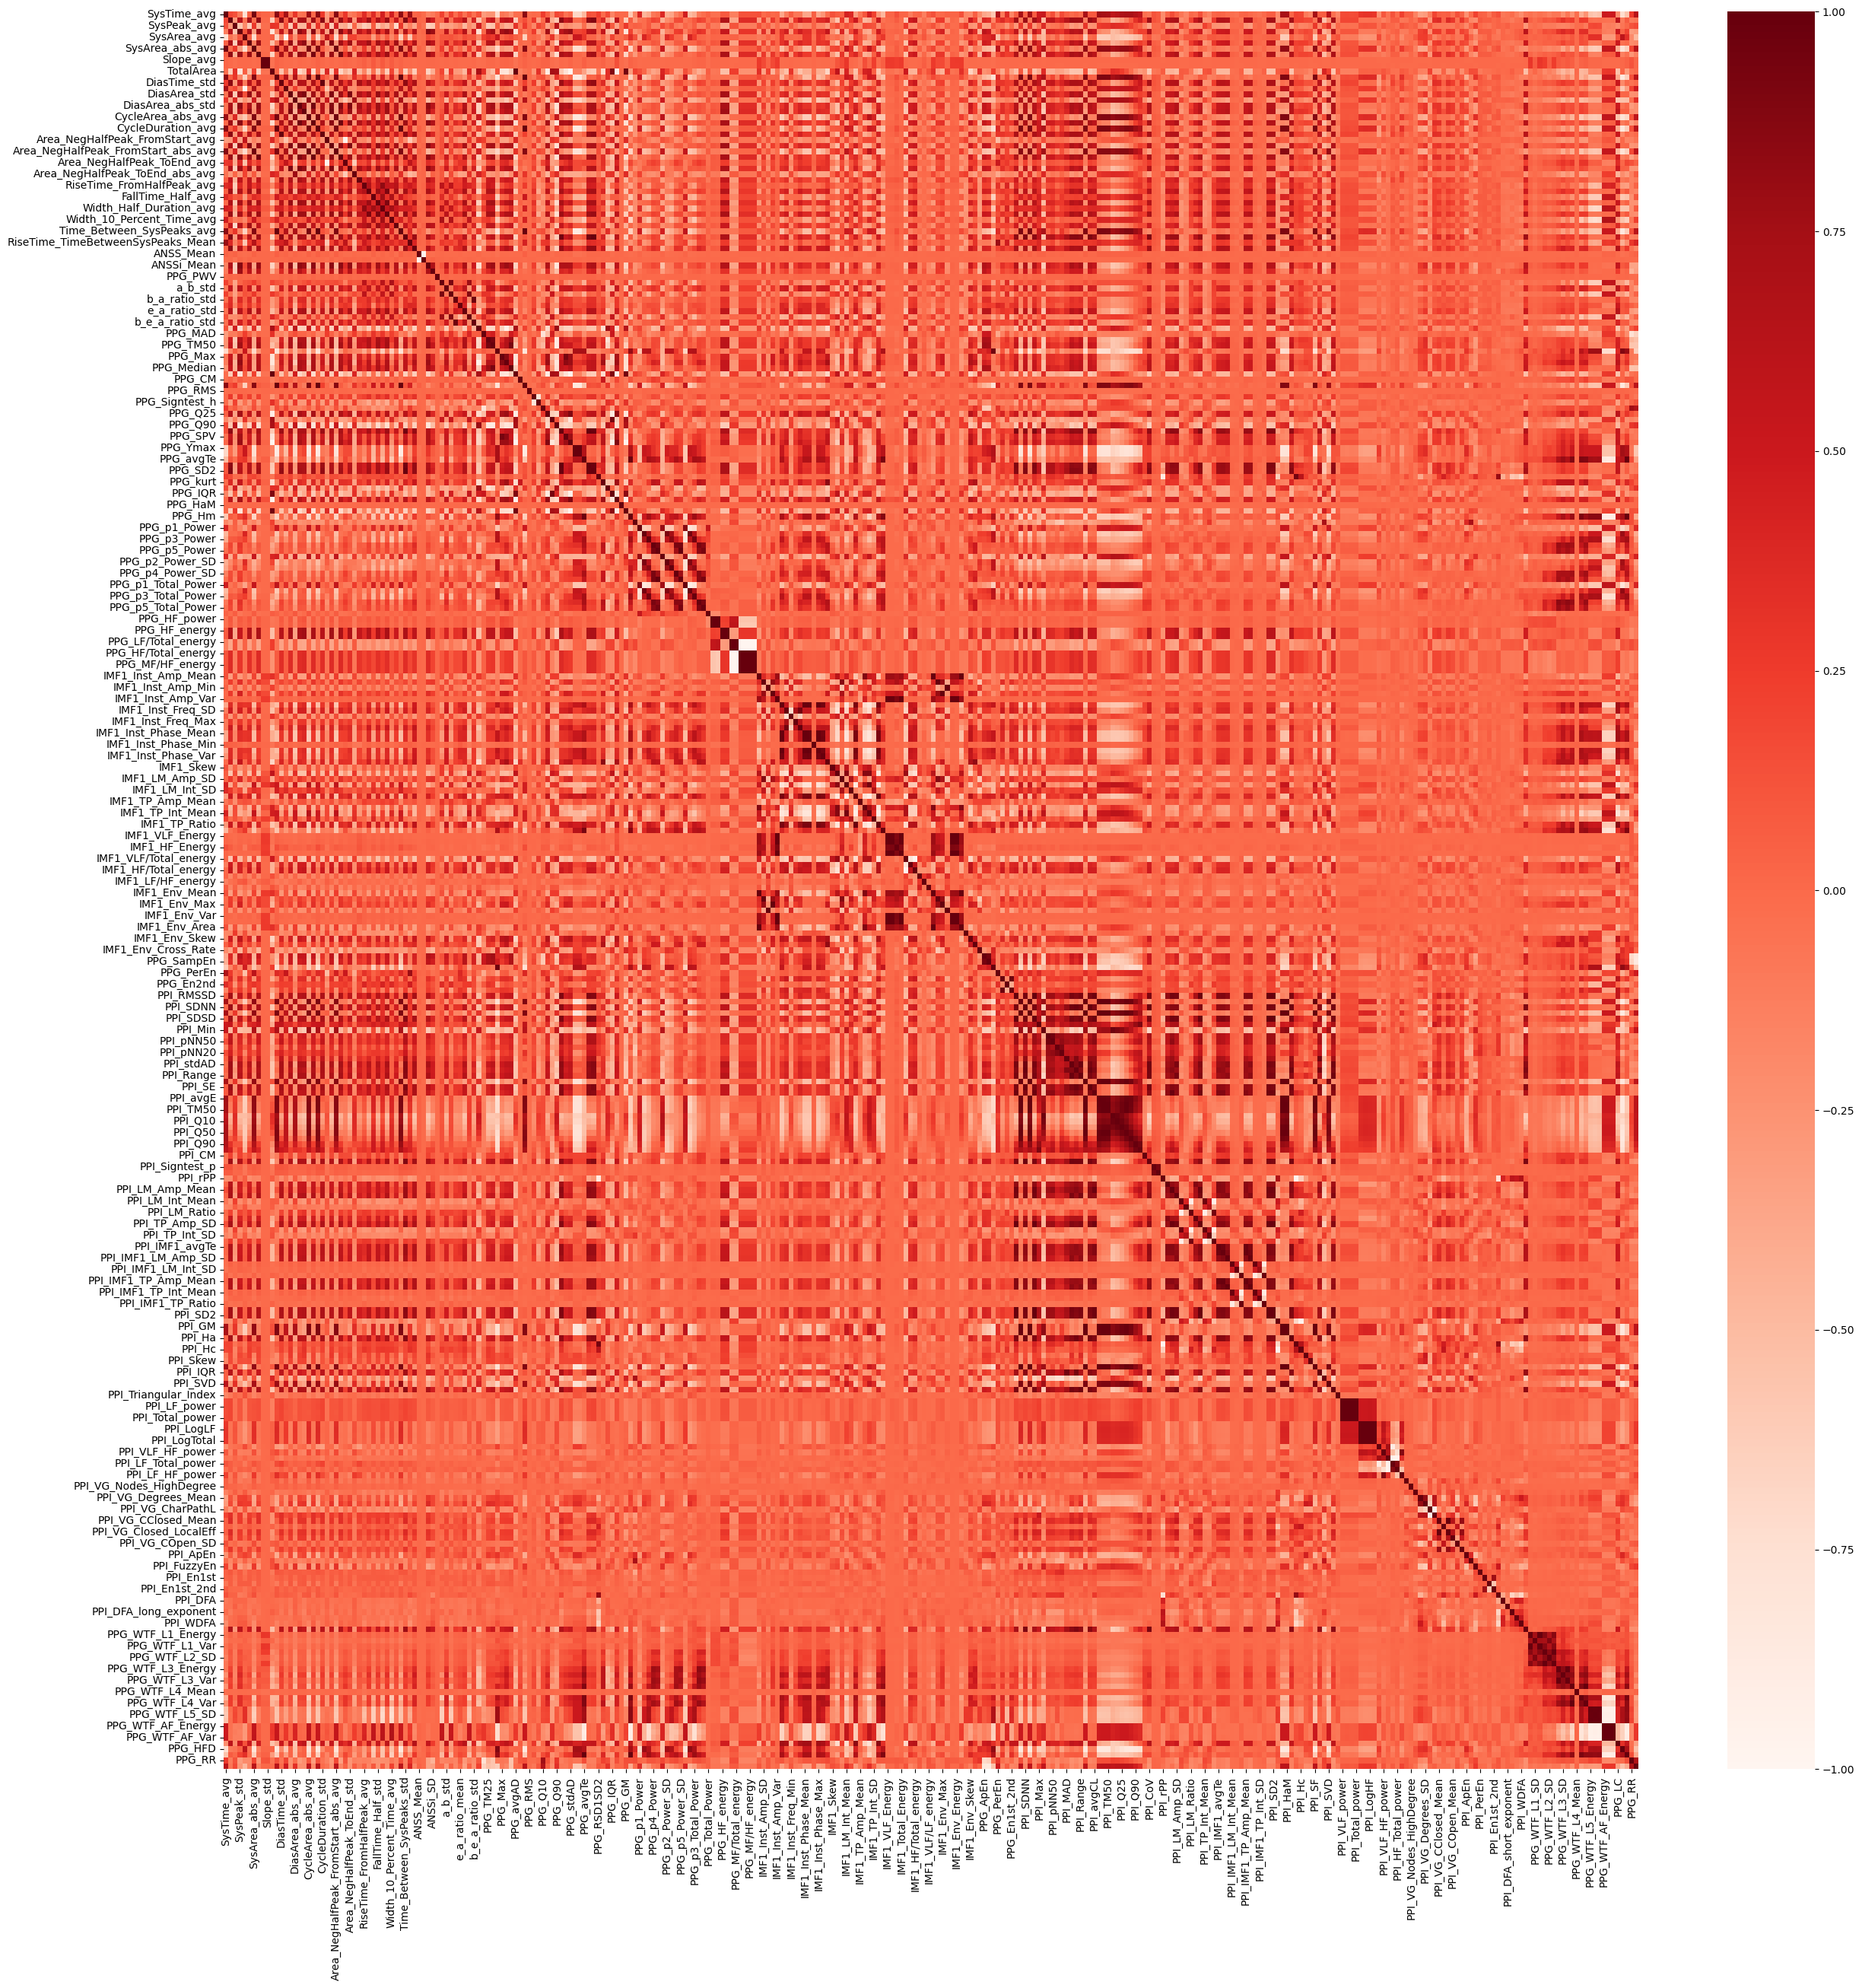

In [41]:
cor = features_imputed.corr()
plt.figure(figsize=(30,30))
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()


In [42]:
# Select upper triangle of correlation matrix
upper_tri = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

print("Columns to drop due to high correlation:", to_drop)


Columns to drop due to high correlation: ['Slope_std', 'CycleArea_abs_std', 'CycleDuration_avg', 'CycleDuration_std', 'Area_NegHalfPeak_FromStart_abs_avg', 'Area_NegHalfPeak_FromStart_abs_std', 'Time_Between_SysPeaks_avg', 'b_e_a_ratio_std', 'PPG_avgAD', 'PPG_RMSSD', 'PPG_Ymin', 'PPG_SD1', 'PPG_SD2', 'PPG_Hm', 'PPG_p5_Power_SD', 'PPG_Total_power2', 'PPG_Total_energy', 'PPG_MF/Total_energy', 'PPG_LF/HF_energy', 'PPG_MF/HF_energy', 'PPG_LF/MF_energy', 'IMF1_Inst_Freq_Var', 'IMF1_Inst_Phase_Mean', 'IMF1_Inst_Phase_SD', 'IMF1_Inst_Phase_Max', 'IMF1_Inst_Phase_Var', 'IMF1_TP_Ratio', 'IMF1_VLF_Energy', 'IMF1_LF_Energy', 'IMF1_Total_Energy', 'IMF1_Env_Mean', 'IMF1_Env_SD', 'IMF1_Env_Max', 'IMF1_Env_Min', 'IMF1_Env_Var', 'IMF1_Env_Energy', 'IMF1_Env_Area', 'PPG_FuzzyEn', 'PPG_En1st_2nd', 'PPI_Mean', 'PPI_SDSD', 'PPI_pNN50', 'PPI_stdAD', 'PPI_avgAD', 'PPI_Range', 'PPI_Median', 'PPI_SE', 'PPI_avgCL', 'PPI_avgE', 'PPI_TM25', 'PPI_TM50', 'PPI_Q5', 'PPI_Q10', 'PPI_Q25', 'PPI_Q50', 'PPI_Q75', 'PPI_C

In [43]:
# Drop these columns from the DataFrame
df_revised = df.drop(columns=to_drop)

In [44]:
# Check NaNs

#df_revised = df
nan_columns = df_revised.columns[df_revised.isna().any()].tolist()

print("Columns with NaN values:")
print(nan_columns)

nan_counts = df_revised.isna().sum()
print("Number of NaN values in each column:")
print(nan_counts[nan_counts > 0])

# Calculate the threshold for 10% of the total number of rows
threshold = 0.02 * len(df_revised)

# Filter columns where the number of NaN values exceeds the threshold
nan_columns_2percent = nan_counts[nan_counts >= threshold]

# Print the columns with NaN values exceeding the threshold
print("Columns with NaN values exceeding 2% of the total data:")
print(nan_columns_2percent)


Columns with NaN values:
['Slope_avg', 'a_b_mean', 'a_b_std', 'b_a_ratio_mean', 'b_a_ratio_std', 'e_a_ratio_mean', 'e_a_ratio_std', 'b_e_a_ratio_mean', 'PPI_RMSSD', 'PPI_RMS', 'PPI_SDNN', 'PPI_Max', 'PPI_Min', 'PPI_NN50', 'PPI_NN20', 'PPI_pNN20', 'PPI_MAD', 'PPI_Q90', 'PPI_Q95', 'PPI_CM', 'PPI_Signtest_p', 'PPI_Normalitytest_h', 'PPI_rPP', 'PPI_avgTe', 'PPI_LM_Amp_SD', 'PPI_LM_Int_Mean', 'PPI_LM_Int_SD', 'PPI_LM_Ratio', 'PPI_TP_Amp_Mean', 'PPI_TP_Int_SD', 'PPI_TP_Ratio', 'PPI_IMF1_avgTe', 'PPI_IMF1_LM_Amp_SD', 'PPI_IMF1_LM_Int_Mean', 'PPI_IMF1_LM_Int_SD', 'PPI_IMF1_LM_Ratio', 'PPI_IMF1_TP_Int_SD', 'PPI_RSD1SD2', 'PPI_Ha', 'PPI_Hm', 'PPI_Hc', 'PPI_Kurt', 'PPI_Skew', 'PPI_IQR', 'PPI_CCM', 'PPI_SVD', 'PPI_Triangular_Index', 'PPI_VLF_power', 'PPI_LogVLF', 'PPI_VLF_LF_power', 'PPI_VLF_HF_power', 'PPI_VLF_Total_power', 'PPI_LF_Total_power', 'PPI_HF_Total_power', 'PPI_LF_HF_power', 'PPI_VG_Nodes_SmallDegree', 'PPI_VG_Nodes_HighDegree', 'PPI_VG_Slope_PowerLawFit', 'PPI_VG_Degrees_Mean', 'PPI_V

In [45]:
# Drop columns where more than 2% of data is NaNs
columns_to_drop = ['PPI_VG_Slope_PowerLawFit', 'PPI_VG_COpen_Mean', 'PPI_VG_COpen_SD']

# Drop the specified columns from the DataFrame
df_revised = df_revised.drop(columns=columns_to_drop)


In [46]:
# Convert the list to a DataFrame
df_to_drop = pd.DataFrame(to_drop, columns=['Columns to Drop'])

# Export the DataFrame to a CSV file
df_to_drop.to_csv('columns_to_drop4_stages.csv', index=False)

In [47]:
df_revised

4_stages  SysTime_avg  SysTime_std  SysPeak_avg  SysPeak_std  \
0             0     0.243075     0.106977     2.051287     1.271953   
1             0     0.343277     0.225440     1.927268     1.754324   
2             0     0.274200     0.101530     2.242864     1.318513   
3             0     0.437240     0.398992     2.824896     1.867212   
4             0     0.274282     0.135000     2.913433     0.555042   
...         ...          ...          ...          ...          ...   
85537         0     0.457332     0.147955     2.894850     0.439800   
85538         0     0.418870     0.159254     2.790856     0.775927   
85539         0     0.418692     0.121094     2.838916     0.431103   
85540         0     0.412946     0.169847     2.848124     0.521313   
85541         0     0.405382     0.130806     2.855208     0.453715   

       SysArea_avg  SysArea_std  SysArea_abs_avg  SysArea_abs_std  Slope_avg  \
0        -1.285312    14.791261         0.190149         0.285010   0.129524   
1         2.661957    17.248446         0.190526         0.227912   0.250397   
2         0.956881    15.603188         0.206661         0.128348   0.152634   
3        -1.905432    15.568619         0.304404         0.272068   0.299215   
4         1.484555    19.700900         0.274228         0.189381   0.094563   
...            ...          ...              ...              ...        ...   
85537     0.939364     7.744200         0.444941         0.150386   0.156556   
85538     3.364588     9.194997         0.412621         0.191717   0.245752   
85539     3.748585     6.014400         0.411671         0.143435   0.145413   
85540     2.600567     7.562719         0.405593         0.191824   0.140956   
85541     4.948779     6.936011         0.398858         0.159182   0.139168   

       ...  PPG_WTF_L3_SD  PPG_WTF_L4_Energy  PPG_WTF_L4_Mean  PPG_WTF_L4_SD  \
0      ...       0.073414          73.786172         0.002251       0.544357   
1      ...       0.171489         124.451367         0.015561       0.706797   
2      ...       0.065740          47.301892         0.003026       0.435842   
3      ...       0.193904         357.419869        -0.028818       1.197743   
4      ...       0.054526          51.561563        -0.002476       0.455048   
...    ...            ...                ...              ...            ...   
85537  ...       0.038033          12.749257         0.005656       0.226207   
85538  ...       0.033554          14.531636        -0.000582       0.241577   
85539  ...       0.039415          13.286614        -0.001612       0.230992   
85540  ...       0.044691          13.945365         0.003660       0.236626   
85541  ...       0.034061          14.841751        -0.000050       0.244142   

       PPG_WTF_L5_Energy  PPG_WTF_AF_Energy     PPG_LC   PPG_HFD    PPG_RR  \
0             469.265490        3326.216471  56.679685  1.596500  0.103262   
1             986.855721        2731.753050  59.669821  1.481480  0.100278   
2             452.286898        3424.140494  61.623213  1.512300  0.070013   
3             748.970794        2720.494751  62.408353  1.531390  0.075477   
4             495.221854        3298.400148  56.876811  1.638568  0.066558   
...                  ...                ...        ...       ...       ...   
85537         291.749987        3568.318762  50.156012  1.312859  0.086904   
85538         238.542476        3596.889402  51.241862  1.329070  0.086235   
85539         255.100137        3622.677753  49.838657  1.319159  0.101377   
85540         336.559393        3546.296684  50.857749  1.367742  0.084736   
85541         250.108940        3582.883172  49.525380  1.349788  0.093510   

        PPG_DET  
0      0.916861  
1      0.961463  
2      0.889709  
3      0.864056  
4      0.853705  
...         ...  
85537  0.944182  
85538  0.943974  
85539  0.951243  
85540  0.934705  
85541  0.941113  

[85542 rows x 219 columns]

# Prepare X and y

In [48]:
# Load subjects
df_subjects = pd.read_csv("/Users/karmenmarkov/Library/CloudStorage/GoogleDrive-kkarmenmarkov@gmail.com/My Drive/masters_ppg/subjects.csv")

# Merge
df_revised = df_revised.copy()
df_revised['SubjectID'] = df_subjects['SubjectID']

# Assuming you've already done data preparation up to scaling
# Drop the '2_stages' and 'Subject' columns to get the features
X = df_revised.drop(['4_stages', 'SubjectID'], axis=1) #'PPI_GM', 'PPG_Hc', 'PPI_Signtest_h', 'PPI_Normalitytest_p', 'PPI_peakVLF'

# Convert labels and subjects for later use
y = df_revised['4_stages']
groups = df_revised['SubjectID']



# SMOTE Balancing

In [49]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

def resample_within_groups(X, y, groups):
    unique_groups = np.unique(groups)
    resampled_X, resampled_y, resampled_groups = [], [], []
    imputer = SimpleImputer(strategy='mean')  # Define the imputer

    for group in unique_groups:
        mask = groups == group
        X_g, y_g = X[mask], y[mask]
        
        # Impute missing values
        X_g = imputer.fit_transform(X_g)
        
        smote = SMOTE(random_state=42)
        X_resampled_g, y_resampled_g = smote.fit_resample(X_g, y_g)
        resampled_X.append(pd.DataFrame(X_resampled_g, columns=X.columns))  # Convert back to DataFrame to maintain feature names
        resampled_y.append(pd.Series(y_resampled_g))  # Convert back to Series
        resampled_groups.extend([group] * len(y_resampled_g))  # Extend the groups array with the current group repeated for the resampled size

    return pd.concat(resampled_X, ignore_index=True), pd.concat(resampled_y, ignore_index=True), np.array(resampled_groups)

# Usage of the function with sample data
# Assume X, y, and groups are already defined and appropriately prepared
X_resampled, y_resampled, groups_resampled = resample_within_groups(X, y, groups)



In [50]:
# Get classes in X_train
label_counts = y_resampled.value_counts()
print(label_counts)

4_stages
0    38197
1    38197
2    38197
3    38197
Name: count, dtype: int64


# Feature Selection

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


sfm = SelectFromModel(estimator=RandomForestClassifier(n_estimators=100, random_state=42))
sfm.fit(X_resampled, y_resampled)

# Get the boolean mask indicating which features are selected
selected_features_mask = sfm.get_support()

# Get the names of the selected features from the original DataFrame
selected_features = X_resampled.columns[selected_features_mask]

print("Selected features:", selected_features)


Selected features: Index(['SysTime_avg', 'SysTime_std', 'SysPeak_avg', 'SysArea_avg',
       'SysArea_std', 'SysArea_abs_avg', 'Slope_avg', 'TotalArea',
       'DiasTime_avg', 'DiasArea_avg', 'DiasArea_std', 'DiasArea_abs_avg',
       'CycleArea_std', 'Area_NegHalfPeak_FromStart_avg',
       'Area_NegHalfPeak_ToEnd_avg', 'Area_NegHalfPeak_ToEnd_abs_avg',
       'RiseTime_FromHalfPeak_avg', 'RiseTime_FromHalfPeak_std',
       'FallTime_Half_avg', 'FallTime_Half_std', 'Width_Half_Duration_avg',
       'Width_Half_Duration_std', 'Width_10_Percent_Time_avg',
       'Width_10_Percent_Time_std', 'RiseTime_TimeBetweenSysPeaks_Mean',
       'RiseTime_TimeBetweenSysPeaks_SD', 'ANSS_Mean', 'ANSSi_Mean',
       'a_b_mean', 'a_b_std', 'b_a_ratio_mean', 'b_a_ratio_std',
       'e_a_ratio_mean', 'e_a_ratio_std', 'b_e_a_ratio_mean', 'PPG_Min',
       'PPG_MAD', 'PPG_TM25', 'PPG_TM50', 'PPG_avgCL', 'PPG_Median', 'PPG_Q10',
       'PPG_Q25', 'PPG_Q75', 'PPG_Q90', 'PPG_SDSD', 'PPG_avgTe', 'PPG_RSD1SD2',

In [15]:
X_selected = X_resampled[selected_features]
X_selected

SysTime_avg  SysTime_std  SysPeak_avg  SysArea_avg  SysArea_std  \
0          0.243075     0.106977     2.051287    -1.285312    14.791261   
1          0.343277     0.225440     1.927268     2.661957    17.248446   
2          0.274200     0.101530     2.242864     0.956881    15.603188   
3          0.437240     0.398992     2.824896    -1.905432    15.568619   
4          0.274282     0.135000     2.913433     1.484555    19.700900   
...             ...          ...          ...          ...          ...   
152783     0.384032     0.117038     2.879134     4.633855     6.745765   
152784     0.406885     0.179744     2.843713     3.724092     6.201947   
152785     0.414110     0.127196     2.896624     5.186065     6.914877   
152786     0.376189     0.122160     2.849540     5.433823     7.722866   
152787     0.387278     0.135038     2.854268     4.031005     7.236186   

        SysArea_abs_avg  Slope_avg  TotalArea  DiasTime_avg  DiasArea_avg  \
0              0.190149   0.129524  20.185956      0.665483      1.261417   
1              0.190526   0.250397  18.963432      0.897964     -2.347344   
2              0.206661   0.152634  22.063562      0.709604     -0.729983   
3              0.304404   0.299215  21.087311      0.984896      2.499454   
4              0.274228   0.094563  25.268359      0.757390     -1.118548   
...                 ...        ...        ...           ...           ...   
152783         0.387010   0.131320  25.444036      1.031352     -4.506040   
152784         0.390870   0.139898  25.369543      1.038172     -5.201623   
152785         0.413963   0.140588  25.536921      1.096555     -5.603581   
152786         0.378962   0.130100  25.335454      1.018241     -4.605280   
152787         0.386670   0.133478  25.234291      1.024791     -4.032482   

        ...  PPI_FuzzyEn   PPI_HFD  PPI_WDFA  PPG_WTF_L4_Energy  \
0       ...     0.782374  1.840314  1.041127          73.786172   
1       ...     0.942035  1.670130  1.191702         124.451367   
2       ...     1.311633  1.935544  0.566286          47.301892   
3       ...     1.408809  1.842306  0.691065         357.419869   
4       ...     1.165285  1.902181  1.272573          51.561563   
...     ...          ...       ...       ...                ...   
152783  ...     2.103730  1.980164  0.830791          19.607268   
152784  ...     2.052273  1.936563  1.016624          15.149437   
152785  ...     2.138352  2.011887  0.424335          12.585854   
152786  ...     1.944675  2.046753  0.490126          21.338127   
152787  ...     1.931489  2.079762  0.598351          16.255866   

        PPG_WTF_L4_SD  PPG_WTF_L5_Energy     PPG_LC   PPG_HFD    PPG_RR  \
0            0.544357         469.265490  56.679685  1.596500  0.103262   
1            0.706797         986.855721  59.669821  1.481480  0.100278   
2            0.435842         452.286898  61.623213  1.512300  0.070013   
3            1.197743         748.970794  62.408353  1.531390  0.075477   
4            0.455048         495.221854  56.876811  1.638568  0.066558   
...               ...                ...        ...       ...       ...   
152783       0.280155         350.058063  51.516060  1.350788  0.081357   
152784       0.246266         281.101973  49.548253  1.359264  0.079033   
152785       0.224183         253.607892  49.044695  1.318829  0.085130   
152786       0.292278         311.849663  52.125877  1.359216  0.079878   
152787       0.255461         280.243586  51.742891  1.341542  0.078230   

         PPG_DET  
0       0.916861  
1       0.961463  
2       0.889709  
3       0.864056  
4       0.853705  
...          ...  
152783  0.928866  
152784  0.928644  
152785  0.939554  
152786  0.927210  
152787  0.929420  

[152788 rows x 96 columns]

In [34]:
X_selected = X_resampled[['SysTime_avg', 'SysTime_std', 'SysPeak_avg', 'SysArea_avg',
       'SysArea_std', 'SysArea_abs_avg', 'Slope_avg', 'TotalArea',
       'DiasTime_avg', 'DiasArea_avg', 'DiasArea_std', 'DiasArea_abs_avg',
       'CycleArea_std', 'Area_NegHalfPeak_FromStart_avg',
       'Area_NegHalfPeak_ToEnd_avg', 'Area_NegHalfPeak_ToEnd_abs_avg',
       'RiseTime_FromHalfPeak_avg', 'RiseTime_FromHalfPeak_std',
       'FallTime_Half_avg', 'FallTime_Half_std', 'Width_Half_Duration_avg',
       'Width_Half_Duration_std', 'Width_10_Percent_Time_avg',
       'Width_10_Percent_Time_std', 'RiseTime_TimeBetweenSysPeaks_Mean',
       'RiseTime_TimeBetweenSysPeaks_SD', 'ANSS_Mean', 'ANSSi_Mean',
       'a_b_mean', 'a_b_std', 'b_a_ratio_mean', 'b_a_ratio_std',
       'e_a_ratio_mean', 'e_a_ratio_std', 'b_e_a_ratio_mean', 'PPG_Min',
       'PPG_MAD', 'PPG_TM25', 'PPG_TM50', 'PPG_avgCL', 'PPG_Median', 'PPG_Q10',
       'PPG_Q25', 'PPG_Q75', 'PPG_Q90', 'PPG_SDSD', 'PPG_avgTe', 'PPG_RSD1SD2',
       'PPG_kurt', 'PPG_skew', 'PPG_IQR', 'PPG_SF', 'PPG_GM', 'PPG_p3_Power',
       'PPG_p4_Power', 'PPG_p3_Power_SD', 'PPG_p4_Power_SD',
       'PPG_p1_Total_Power', 'PPG_p2_Total_Power', 'PPG_p3_Total_Power',
       'PPG_p4_Total_Power', 'IMF1_Inst_Amp_Mean', 'IMF1_Inst_Freq_Mean',
       'IMF1_LM_Int_Mean', 'IMF1_TP_Amp_SD', 'IMF1_TP_Int_Mean',
       'IMF1_TP_Int_SD', 'IMF1_avgTE', 'PPG_ApEn', 'PPG_SampEn', 'PPG_PerEn',
       'PPG_En1st', 'PPG_En2nd', 'PPI_RMSSD', 'PPI_RMS', 'PPI_Min', 'PPI_NN20',
       'PPI_pNN20', 'PPI_Q90', 'PPI_Q95', 'PPI_CM', 'PPI_IMF1_avgTe',
       'PPI_RSD1SD2', 'PPI_Hc', 'PPI_CCM', 'PPI_SVD', 'PPI_FuzzyEn', 'PPI_HFD',
       'PPI_WDFA', 'PPG_WTF_L4_Energy', 'PPG_WTF_L4_SD', 'PPG_WTF_L5_Energy',
       'PPG_LC', 'PPG_HFD', 'PPG_RR', 'PPG_DET']]

# Hyperparameter Tuning

In [16]:
from sklearn.model_selection import train_test_split, GroupKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer, matthews_corrcoef

# Split your data into a smaller subset for quick exploration
X_sample, _, y_sample, _, groups_sample, _ = train_test_split(X_selected, y_resampled, groups_resampled, test_size=0.5, random_state=42, stratify = y_resampled)

# Initialize the pipeline with the steps
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define parameters for RandomizedSearchCV, ensuring they're prefixed according to the pipeline steps
param_dist_rf = {
    'classifier__n_estimators': sp_randint(100, 500),
    'classifier__max_depth': [None] + list(range(3, 20)),
    'classifier__min_samples_split': sp_randint(2, 11),
    'classifier__min_samples_leaf': sp_randint(1, 11),
    'classifier__max_features': [None, 'sqrt', 'log2'],
    'classifier__bootstrap': [True, False]
}

# Define the GroupKFold cross-validator
gkf = GroupKFold(n_splits=3)

# Define MCC as the scoring metric using make_scorer
mcc_scorer = make_scorer(matthews_corrcoef)

# Set up RandomizedSearchCV with the pipeline
random_search_rf = RandomizedSearchCV(
    estimator=pipeline_rf,  # Use the pipeline as the estimator
    param_distributions=param_dist_rf,
    n_iter=100,  # Adjust based on computational resources
    scoring=mcc_scorer,  # Choose an appropriate scoring method
    n_jobs=-1,  # Use all available cores
    cv=gkf.split(X_sample, y_sample, groups_sample),  # Ensure GroupKFold uses group information
    verbose=3,
    random_state=42,
)

# Fit RandomizedSearchCV
random_search_rf.fit(X_sample, y_sample)

# After fitting, output the best parameters and score
print("Best parameters found: ", random_search_rf.best_params_)
print("Best score: ", random_search_rf.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 3/3] END classifier__bootstrap=True, classifier__max_depth=16, classifier__max_features=log2, classifier__min_samples_leaf=8, classifier__min_samples_split=6, classifier__n_estimators=202;, score=0.104 total time= 1.7min
[CV 1/3] END classifier__bootstrap=True, classifier__max_depth=16, classifier__max_features=log2, classifier__min_samples_leaf=8, classifier__min_samples_split=6, classifier__n_estimators=202;, score=0.144 total time= 1.7min
[CV 2/3] END classifier__bootstrap=True, classifier__max_depth=16, classifier__max_features=log2, classifier__min_samples_leaf=8, classifier__min_samples_split=6, classifier__n_estimators=202;, score=0.140 total time= 1.8min
[CV 3/3] END classifier__bootstrap=False, classifier__max_depth=12, classifier__max_features=log2, classifier__min_samples_leaf=8, classifier__min_samples_split=6, classifier__n_estimators=199;, score=0.105 total time= 2.3min
[CV 1/3] END classifier__bootstrap=F

/Users/karmenmarkov/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 2/3] END classifier__bootstrap=True, classifier__max_depth=19, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=369;, score=0.133 total time= 5.8min
[CV 3/3] END classifier__bootstrap=True, classifier__max_depth=19, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=369;, score=0.104 total time= 5.7min
[CV 1/3] END classifier__bootstrap=True, classifier__max_depth=17, classifier__max_features=log2, classifier__min_samples_leaf=8, classifier__min_samples_split=8, classifier__n_estimators=351;, score=0.138 total time= 3.4min
[CV 2/3] END classifier__bootstrap=True, classifier__max_depth=17, classifier__max_features=log2, classifier__min_samples_leaf=8, classifier__min_samples_split=8, classifier__n_estimators=351;, score=0.141 total time= 3.4min
[CV 3/3] END classifier__bootstrap=True, classifier__max_depth=17, classifier__max_features=log2, cl

In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid based on the results of random search
param_grid_rf = {
    'classifier__bootstrap': [True],
    'classifier__max_depth': [4, 16, 18],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__min_samples_leaf': [4, 8, 10],
    'classifier__min_samples_split': [4, 6],
    'classifier__n_estimators': [200, 500]
}

# Set up GridSearchCV with the pipeline
grid_search_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    scoring=mcc_scorer,
    n_jobs=-1,
    cv=gkf.split(X_selected, y_resampled, groups=groups_resampled),
    verbose=3
)

# Fit GridSearchCV
grid_search_rf.fit(X_selected, y_resampled)

# Output the best parameters and score from grid search
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 2/3] END classifier__bootstrap=True, classifier__max_depth=4, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=4, classifier__n_estimators=200;, score=0.154 total time= 1.8min
[CV 2/3] END classifier__bootstrap=True, classifier__max_depth=4, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=6, classifier__n_estimators=200;, score=0.154 total time= 1.8min
[CV 1/3] END classifier__bootstrap=True, classifier__max_depth=4, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=6, classifier__n_estimators=200;, score=0.128 total time= 1.8min
[CV 1/3] END classifier__bootstrap=True, classifier__max_depth=4, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=4, classifier__n_estimators=200;, score=0.128 total time= 1.8min
[CV 3/3] END classifier__bootstrap=True, c

/Users/karmenmarkov/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 3/3] END classifier__bootstrap=True, classifier__max_depth=16, classifier__max_features=log2, classifier__min_samples_leaf=4, classifier__min_samples_split=6, classifier__n_estimators=500;, score=0.125 total time= 8.0min
[CV 2/3] END classifier__bootstrap=True, classifier__max_depth=16, classifier__max_features=log2, classifier__min_samples_leaf=8, classifier__min_samples_split=6, classifier__n_estimators=200;, score=0.140 total time= 3.0min
[CV 1/3] END classifier__bootstrap=True, classifier__max_depth=16, classifier__max_features=log2, classifier__min_samples_leaf=8, classifier__min_samples_split=4, classifier__n_estimators=500;, score=0.148 total time= 7.6min
[CV 3/3] END classifier__bootstrap=True, classifier__max_depth=16, classifier__max_features=log2, classifier__min_samples_leaf=8, classifier__min_samples_split=6, classifier__n_estimators=200;, score=0.122 total time= 3.0min
[CV 2/3] END classifier__bootstrap=True, classifier__max_depth=16, classifier__max_features=log2, cl

# Training models

## 5-fold CV

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict


# Define your classifier with the best parameters found
rf_classifier = RandomForestClassifier(
    bootstrap=True,
    max_depth=16,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=4,
    n_estimators=500,
    random_state=42
)

# Create the pipeline
pipeline = Pipeline([
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=5)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Number of classes, assuming 5 for a 5-stage classifier
n_classes = 4

# Collect the specificity for each fold
fold_specificity = []

# Initialize the confusion matrix
final_confusion_matrix_5cv = np.zeros((4, 4), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_5cv += confusion_matrix(y_test, y_pred)

    # Calculate specificity for each class
    class_specificities = []
    for class_index in range(n_classes):
        true_negative = np.sum(fold_confusion_matrix) - np.sum(fold_confusion_matrix[class_index, :]) - np.sum(fold_confusion_matrix[:, class_index]) + fold_confusion_matrix[class_index, class_index]
        false_positive = np.sum(fold_confusion_matrix[:, class_index]) - fold_confusion_matrix[class_index, class_index]
        class_specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        class_specificities.append(class_specificity)

    # Compute the average specificity for this fold
    average_specificity = np.mean(class_specificities)
    fold_specificity.append(average_specificity)

    # Calculate metrics for the fold (using average='micro' for multi-class problems)
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred, average='micro')  # Same as sensitivity
    fold_precision = precision_score(y_test, y_pred, average='micro')
    fold_f1 = f1_score(y_test, y_pred, average='micro')
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(average_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)


# Convert the metrics dictionary to a DataFrame
metrics_df_5cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_5cv = metrics_df_5cv.mean()
metrics_std_5cv = metrics_df_5cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_5cv)
print(metrics_std_5cv)
print('Final Confusion Matrix:\n', final_confusion_matrix_5cv)


Test set distribution: 4_stages
0    7445
1    7445
2    7445
3    7445
Name: count, dtype: int64
Test set distribution: 4_stages
0    7707
1    7707
2    7707
3    7707
Name: count, dtype: int64
Test set distribution: 4_stages
0    7706
1    7706
2    7706
3    7706
Name: count, dtype: int64
Test set distribution: 4_stages
0    7693
1    7693
2    7693
3    7693
Name: count, dtype: int64
Test set distribution: 4_stages
0    7646
1    7646
2    7646
3    7646
Name: count, dtype: int64
Accuracy       0.358093
Sensitivity    0.358093
Specificity    0.786031
Precision      0.358093
F1 Score       0.358093
MCC            0.148215
dtype: float64
Accuracy       0.035262
Sensitivity    0.035262
Specificity    0.011754
Precision      0.035262
F1 Score       0.035262
MCC            0.047004
dtype: float64
Final Confusion Matrix:
 [[18340 10250  3078  6529]
 [ 8311 17424  5036  7426]
 [ 8009 16701  6988  6499]
 [ 8013 14400  3823 11961]]


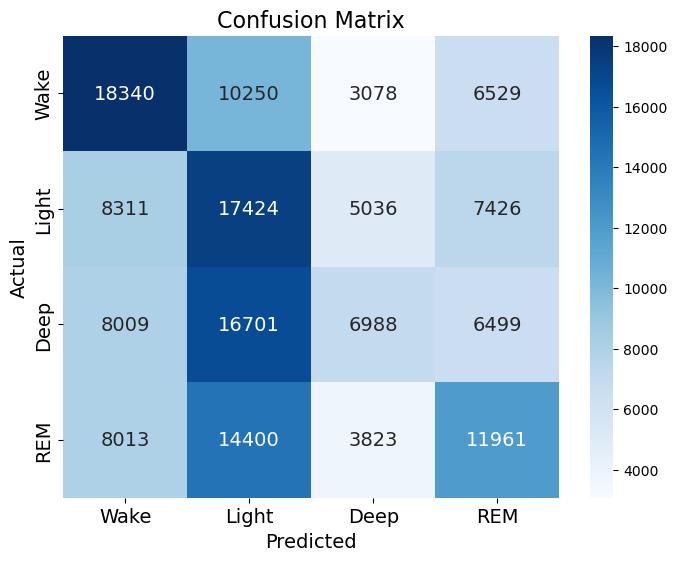

In [15]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_5cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'Light', 'Deep', 'REM'], yticklabels=['Wake', 'Light', 'Deep', 'REM'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GroupKFold
import numpy as np
import pandas as pd


# Wrap the RandomForestClassifier in a OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(rf_classifier)

# Create the pipeline
pipeline = Pipeline([
    ('classifier', ovr_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=5)

# Define the number of classes
n_classes = 4

# Initialize arrays to store results
fold_metrics = []
feature_importances = {i: [] for i in range(n_classes)}  # Store importances per class

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Collect feature importances for each class
    for i, estimator in enumerate(pipeline.named_steps['classifier'].estimators_):
        feature_importances[i].append(estimator.feature_importances_)

    # Collect and compute other metrics (omitted for brevity)

# Average the feature importances over all folds for each class
average_importances = {class_idx: np.mean(importances, axis=0) for class_idx, importances in feature_importances.items()}


In [17]:
# Assume 'feature_names' is a list of your feature names from 'X_selected'
feature_names = X_selected.columns.tolist()

# Convert the dictionary of importances to a DataFrame
importances_df_cv5 = pd.DataFrame({
    'Feature': feature_names,
    'Class 0 Importances': average_importances[0],
    'Class 1 Importances': average_importances[1],
    'Class 2 Importances': average_importances[2],
    'Class 3 Importances': average_importances[3]
})

# Adding a column for the overall importance (mean)
importances_df_cv5['Overall Importance (Mean)'] = importances_df_cv5[['Class 0 Importances', 'Class 1 Importances', 'Class 2 Importances', 'Class 3 Importances']].mean(axis=1)

# Print or save the DataFrame
importances_df_cv5

Feature  Class 0 Importances  Class 1 Importances  \
0         SysTime_avg             0.008583             0.009809   
1         SysTime_std             0.008911             0.008703   
2         SysPeak_avg             0.009503             0.009775   
3         SysArea_avg             0.009814             0.010127   
4         SysArea_std             0.008942             0.009101   
..                ...                  ...                  ...   
91  PPG_WTF_L5_Energy             0.007186             0.008939   
92             PPG_LC             0.019674             0.011664   
93            PPG_HFD             0.009231             0.009676   
94             PPG_RR             0.008380             0.010717   
95            PPG_DET             0.008685             0.010085   

    Class 2 Importances  Class 3 Importances  Overall Importance (Mean)  
0              0.010499             0.011373                   0.010066  
1              0.009778             0.008315                   0.008927  
2              0.009253             0.008979                   0.009378  
3              0.012842             0.012765                   0.011387  
4              0.007582             0.006717                   0.008085  
..                  ...                  ...                        ...  
91             0.007824             0.008256                   0.008051  
92             0.009430             0.012670                   0.013359  
93             0.010334             0.008846                   0.009522  
94             0.008688             0.009649                   0.009358  
95             0.009388             0.010357                   0.009629  

[96 rows x 6 columns]

In [18]:
importances_df_cv5.to_csv('importances_df_cv5_smote_4_stages.csv')

## 10-fold CV

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict

# Create the pipeline
pipeline = Pipeline([
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=10)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Number of classes, assuming 3 for a 3-stage classifier
n_classes = 4

# Collect the specificity for each fold
fold_specificity = []

# Initialize the confusion matrix
final_confusion_matrix_10cv = np.zeros((4, 4), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_10cv += confusion_matrix(y_test, y_pred)

    # Calculate specificity for each class
    class_specificities = []
    for class_index in range(n_classes):
        true_negative = np.sum(fold_confusion_matrix) - np.sum(fold_confusion_matrix[class_index, :]) - np.sum(fold_confusion_matrix[:, class_index]) + fold_confusion_matrix[class_index, class_index]
        false_positive = np.sum(fold_confusion_matrix[:, class_index]) - fold_confusion_matrix[class_index, class_index]
        class_specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        class_specificities.append(class_specificity)

    # Compute the average specificity for this fold
    average_specificity = np.mean(class_specificities)
    fold_specificity.append(average_specificity)

    # Calculate metrics for the fold (using average='micro' for multi-class problems)
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred, average='micro')  # Same as sensitivity
    fold_precision = precision_score(y_test, y_pred, average='micro')
    fold_f1 = f1_score(y_test, y_pred, average='micro')
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(average_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)


# Convert the metrics dictionary to a DataFrame
metrics_df_10cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_10cv = metrics_df_10cv.mean()
metrics_std_10cv = metrics_df_10cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_10cv)
print(metrics_std_10cv)
print('Final Confusion Matrix:\n', final_confusion_matrix_10cv)


Test set distribution: 4_stages
0    3821
1    3821
2    3821
3    3821
Name: count, dtype: int64
Test set distribution: 4_stages
0    3755
1    3755
2    3755
3    3755
Name: count, dtype: int64
Test set distribution: 4_stages
0    3698
1    3698
2    3698
3    3698
Name: count, dtype: int64
Test set distribution: 4_stages
0    3690
1    3690
2    3690
3    3690
Name: count, dtype: int64
Test set distribution: 4_stages
0    3964
1    3964
2    3964
3    3964
Name: count, dtype: int64
Test set distribution: 4_stages
0    3702
1    3702
2    3702
3    3702
Name: count, dtype: int64
Test set distribution: 4_stages
0    3701
1    3701
2    3701
3    3701
Name: count, dtype: int64
Test set distribution: 4_stages
0    3915
1    3915
2    3915
3    3915
Name: count, dtype: int64
Test set distribution: 4_stages
0    3979
1    3979
2    3979
3    3979
Name: count, dtype: int64
Test set distribution: 4_stages
0    3972
1    3972
2    3972
3    3972
Name: count, dtype: int64
Accuracy       0.357

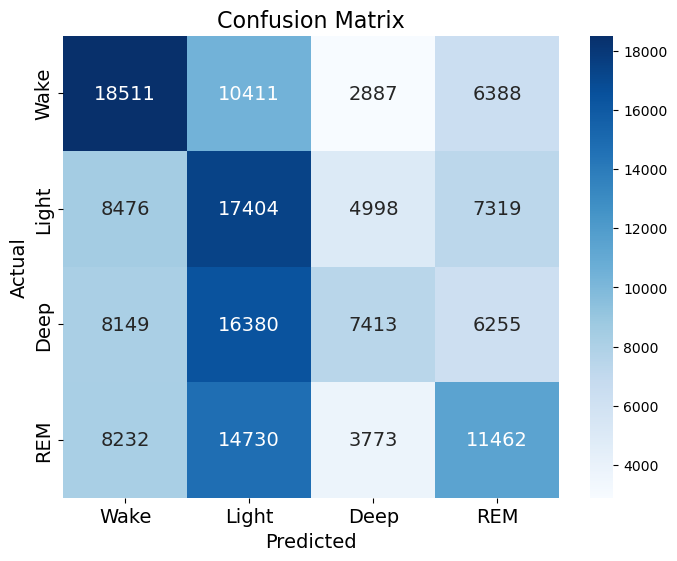

In [20]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_10cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'Light', 'Deep', 'REM'], yticklabels=['Wake', 'Light', 'Deep', 'REM'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GroupKFold


from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict


# Wrap the RandomForestClassifier in a OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(rf_classifier)

# Create the pipeline
pipeline = Pipeline([
    ('classifier', ovr_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=10)

# Define the number of classes
n_classes = 4

# Initialize arrays to store results
fold_metrics = []
feature_importances = {i: [] for i in range(n_classes)}  # Store importances per class

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Collect feature importances for each class
    for i, estimator in enumerate(pipeline.named_steps['classifier'].estimators_):
        feature_importances[i].append(estimator.feature_importances_)

    # Collect and compute other metrics (omitted for brevity)

# Average the feature importances over all folds for each class
average_importances_cv10 = {class_idx: np.mean(importances, axis=0) for class_idx, importances in feature_importances.items()}


In [22]:
# Assume 'feature_names' is a list of your feature names from 'X_selected'
feature_names = X_selected.columns.tolist()

# Convert the dictionary of importances to a DataFrame
importances_df_cv10 = pd.DataFrame({
    'Feature': feature_names,
    'Class 0 Importances': average_importances_cv10[0],
    'Class 1 Importances': average_importances_cv10[1],
    'Class 2 Importances': average_importances_cv10[2],
    'Class 3 Importances': average_importances_cv10[3]
})

# Adding a column for the overall importance (mean)
importances_df_cv10['Overall Importance (Mean)'] = importances_df_cv10[['Class 0 Importances', 'Class 1 Importances', 'Class 2 Importances', 'Class 3 Importances']].mean(axis=1)

# Print or save the DataFrame
importances_df_cv10

Feature  Class 0 Importances  Class 1 Importances  \
0         SysTime_avg             0.008564             0.009649   
1         SysTime_std             0.008982             0.008723   
2         SysPeak_avg             0.009739             0.009921   
3         SysArea_avg             0.009782             0.009950   
4         SysArea_std             0.008605             0.009109   
..                ...                  ...                  ...   
91  PPG_WTF_L5_Energy             0.007239             0.008899   
92             PPG_LC             0.019665             0.011835   
93            PPG_HFD             0.009069             0.009537   
94             PPG_RR             0.008548             0.010625   
95            PPG_DET             0.008844             0.010118   

    Class 2 Importances  Class 3 Importances  Overall Importance (Mean)  
0              0.010676             0.011681                   0.010143  
1              0.009890             0.008438                   0.009008  
2              0.009250             0.009019                   0.009482  
3              0.012845             0.012610                   0.011297  
4              0.007699             0.006775                   0.008047  
..                  ...                  ...                        ...  
91             0.007791             0.008251                   0.008045  
92             0.009387             0.012783                   0.013418  
93             0.010346             0.008902                   0.009464  
94             0.008944             0.009744                   0.009465  
95             0.009316             0.010399                   0.009669  

[96 rows x 6 columns]

In [23]:
importances_df_cv10.to_csv('importances_df_cv10_smote_4_stages.csv')

## 20-fold CV

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.model_selection import cross_val_predict

# Create the pipeline
pipeline = Pipeline([
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=20)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Number of classes, assuming 3 for a 3-stage classifier
n_classes = 4

# Collect the specificity for each fold
fold_specificity = []

# Initialize the confusion matrix
final_confusion_matrix_20cv = np.zeros((4, 4), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    # Split data
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Print the class distribution in the test set
    print("Test set distribution:", y_test.value_counts())

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Update the final confusion matrix
    final_confusion_matrix_20cv += confusion_matrix(y_test, y_pred)

    # Calculate specificity for each class
    class_specificities = []
    for class_index in range(n_classes):
        true_negative = np.sum(fold_confusion_matrix) - np.sum(fold_confusion_matrix[class_index, :]) - np.sum(fold_confusion_matrix[:, class_index]) + fold_confusion_matrix[class_index, class_index]
        false_positive = np.sum(fold_confusion_matrix[:, class_index]) - fold_confusion_matrix[class_index, class_index]
        class_specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0
        class_specificities.append(class_specificity)

    # Compute the average specificity for this fold
    average_specificity = np.mean(class_specificities)
    fold_specificity.append(average_specificity)

    # Calculate metrics for the fold (using average='micro' for multi-class problems)
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred, average='micro')  # Same as sensitivity
    fold_precision = precision_score(y_test, y_pred, average='micro')
    fold_f1 = f1_score(y_test, y_pred, average='micro')
    fold_mcc = matthews_corrcoef(y_test, y_pred)

    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(average_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)


# Convert the metrics dictionary to a DataFrame
metrics_df_20cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_20cv = metrics_df_20cv.mean()
metrics_std_20cv = metrics_df_20cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_20cv)
print(metrics_std_20cv)
print('Final Confusion Matrix:\n', final_confusion_matrix_20cv)


Test set distribution: 4_stages
0    2057
1    2057
2    2057
3    2057
Name: count, dtype: int64
Test set distribution: 4_stages
0    1988
1    1988
2    1988
3    1988
Name: count, dtype: int64
Test set distribution: 4_stages
0    1858
1    1858
2    1858
3    1858
Name: count, dtype: int64
Test set distribution: 4_stages
0    1845
1    1845
3    1845
2    1845
Name: count, dtype: int64
Test set distribution: 4_stages
0    1842
1    1842
2    1842
3    1842
Name: count, dtype: int64
Test set distribution: 4_stages
0    1843
1    1843
2    1843
3    1843
Name: count, dtype: int64
Test set distribution: 4_stages
0    1838
1    1838
3    1838
2    1838
Name: count, dtype: int64
Test set distribution: 4_stages
0    1836
1    1836
2    1836
3    1836
Name: count, dtype: int64
Test set distribution: 4_stages
0    1839
1    1839
2    1839
3    1839
Name: count, dtype: int64
Test set distribution: 4_stages
0    1836
1    1836
2    1836
3    1836
Name: count, dtype: int64
Test set distributio

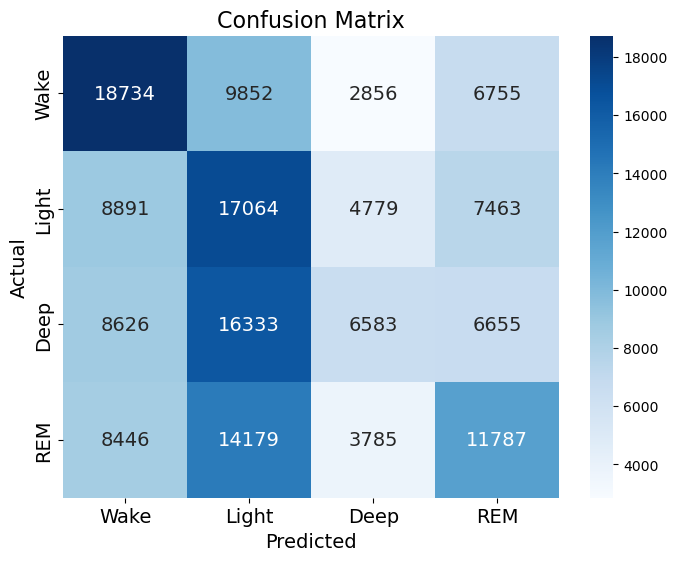

In [25]:
#plot the confusion matrix plot for train data
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = final_confusion_matrix_20cv

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'Light', 'Deep', 'REM'], yticklabels=['Wake', 'Light', 'Deep', 'REM'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GroupKFold
import numpy as np
import pandas as pd


# Wrap the RandomForestClassifier in a OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(rf_classifier)

# Create the pipeline
pipeline = Pipeline([
    ('classifier', ovr_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=20)

# Initialize arrays to store results
fold_metrics = []
feature_importances = {i: [] for i in range(n_classes)}  # Store importances per class

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y_resampled, groups=groups_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)

    # Collect feature importances for each class
    for i, estimator in enumerate(pipeline.named_steps['classifier'].estimators_):
        feature_importances[i].append(estimator.feature_importances_)

    # Collect and compute other metrics (omitted for brevity)

# Average the feature importances over all folds for each class
average_importances_cv20 = {class_idx: np.mean(importances, axis=0) for class_idx, importances in feature_importances.items()}


In [27]:
# Assume 'feature_names' is a list of your feature names from 'X_selected'
feature_names = X_selected.columns.tolist()

# Convert the dictionary of importances to a DataFrame
importances_df_cv20 = pd.DataFrame({
    'Feature': feature_names,
    'Class 0 Importances': average_importances_cv20[0],
    'Class 1 Importances': average_importances_cv20[1],
    'Class 2 Importances': average_importances_cv20[2],
    'Class 3 Importances': average_importances_cv20[3]
})

# Adding a column for the overall importance (mean)
importances_df_cv20['Overall Importance (Mean)'] = importances_df_cv20[['Class 0 Importances', 'Class 1 Importances', 'Class 2 Importances', 'Class 3 Importances']].mean(axis=1)

# Print or save the DataFrame
importances_df_cv20

importances_df_cv20.to_csv('importances_df_cv20.csv')


# Feature importances

In [28]:
# Assuming importances_df_cv10, importances_df_cv5, importances_df_cv20 are already defined
# Step 1: Merge the dataframes on the 'Feature' column
merged_df = pd.merge(importances_df_cv10, importances_df_cv5, on='Feature', suffixes=('_cv10', '_cv5'))
merged_df = pd.merge(merged_df, importances_df_cv20, on='Feature')

# Step 2: Calculate the average importance for each class across the three validation methods
merged_df['Class 0 Average'] = merged_df[['Class 0 Importances_cv10', 'Class 0 Importances_cv5', 'Class 0 Importances']].mean(axis=1)
merged_df['Class 1 Average'] = merged_df[['Class 1 Importances_cv10', 'Class 1 Importances_cv5', 'Class 1 Importances']].mean(axis=1)
merged_df['Class 2 Average'] = merged_df[['Class 2 Importances_cv10', 'Class 2 Importances_cv5', 'Class 2 Importances']].mean(axis=1)
merged_df['Class 3 Average'] = merged_df[['Class 3 Importances_cv10', 'Class 2 Importances_cv5', 'Class 3 Importances']].mean(axis=1)

# Step 3: Calculate the overall mean importance from the averages of each class
merged_df['Overall Importance (Mean)'] = merged_df[['Class 0 Average', 'Class 1 Average', 'Class 2 Average', 'Class 3 Average']].mean(axis=1)

# Optionally, create a DataFrame to view or export just the features and their importances
final_df = merged_df[['Feature', 'Class 0 Average', 'Class 1 Average', 'Class 2 Average', 'Class 3 Average', 'Overall Importance (Mean)']]
final_df

Feature  Class 0 Average  Class 1 Average  Class 2 Average  \
0         SysTime_avg         0.008593         0.009707         0.010628   
1         SysTime_std         0.009000         0.008708         0.009868   
2         SysPeak_avg         0.009615         0.009910         0.009253   
3         SysArea_avg         0.009801         0.009982         0.012842   
4         SysArea_std         0.008739         0.009109         0.007659   
..                ...              ...              ...              ...   
91  PPG_WTF_L5_Energy         0.007192         0.008915         0.007829   
92             PPG_LC         0.019777         0.011790         0.009404   
93            PPG_HFD         0.009113         0.009576         0.010341   
94             PPG_RR         0.008503         0.010681         0.008858   
95            PPG_DET         0.008791         0.010116         0.009304   

    Class 3 Average  Overall Importance (Mean)  
0          0.011229                   0.010039  
1          0.008904                   0.009120  
2          0.009102                   0.009470  
3          0.012758                   0.011346  
4          0.007062                   0.008142  
..              ...                        ...  
91         0.008072                   0.008002  
92         0.011651                   0.013156  
93         0.009363                   0.009598  
94         0.009395                   0.009359  
95         0.010079                   0.009572  

[96 rows x 6 columns]

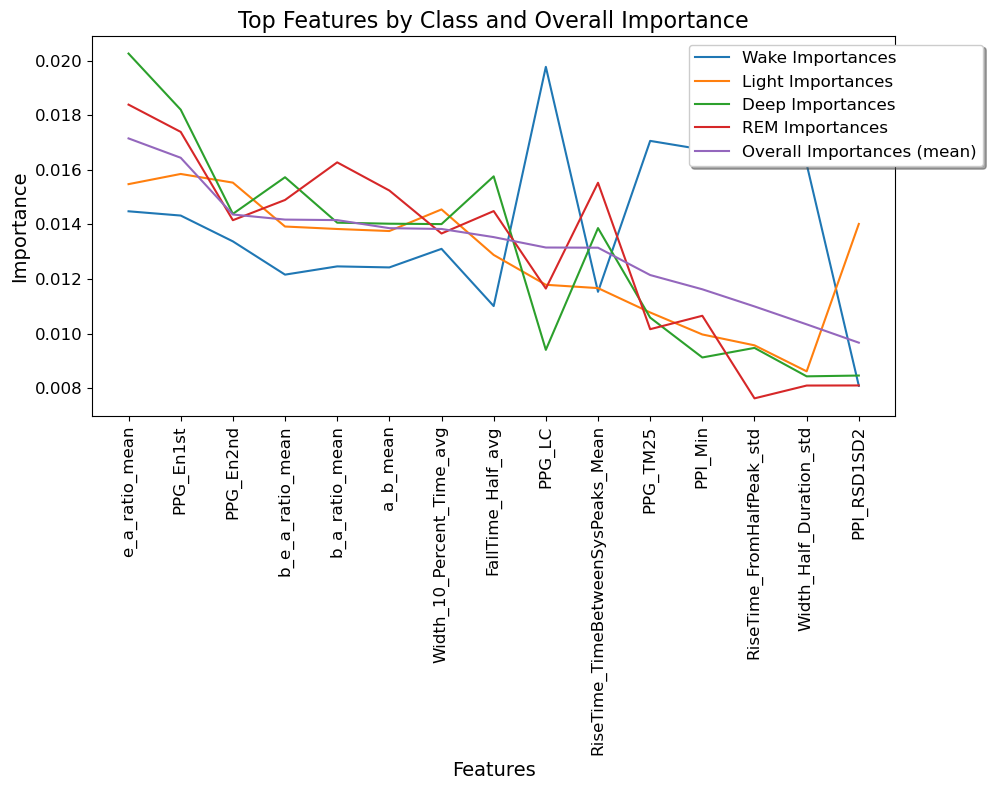

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 for each class
top_class_0 = final_df.nlargest(5, 'Class 0 Average')['Feature']
top_class_1 = final_df.nlargest(5, 'Class 1 Average')['Feature']
top_class_2 = final_df.nlargest(5, 'Class 2 Average')['Feature']
top_class_3 = final_df.nlargest(5, 'Class 3 Average')['Feature']
top_overall = final_df.nlargest(5, 'Overall Importance (Mean)')['Feature']

# Combine and deduplicate the lists of top features
top_features = pd.concat([top_class_0, top_class_1, top_class_2, top_class_3, top_overall]).drop_duplicates()

# Filter the DataFrame to only include the top features
filtered_df = final_df[final_df['Feature'].isin(top_features)]

# Sort the DataFrame by 'Overall Importance (Mean)' in descending order for plotting
filtered_df = filtered_df.sort_values(by='Overall Importance (Mean)', ascending=False)

# Melt the DataFrame for easier plotting
melted_df = pd.melt(filtered_df, id_vars=['Feature'], var_name='Class', value_name='Importance')

# Plotting
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
lineplot = sns.lineplot(data=melted_df, x='Feature', y='Importance', hue='Class')

# Customize the x-axis with feature names
plt.xticks(rotation=90, fontsize=12)  # Rotate the x labels for better readability
plt.yticks(fontsize=12)

plt.title('Top Features by Class and Overall Importance', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.grid(False)

# Customizing legend labels
handles, labels = lineplot.get_legend_handles_labels()
new_labels = ['Wake Importances' if label == 'Class 0 Average' else label for label in labels]
new_labels = ['Light Importances' if label == 'Class 1 Average' else label for label in new_labels]
new_labels = ['Deep Importances' if label == 'Class 2 Average' else label for label in new_labels]
new_labels = ['REM Importances' if label == 'Class 3 Average' else label for label in new_labels]
new_labels = ['Overall Importances (mean)' if 'Mean' in label else label for label in new_labels]  # Rename overall if used

plt.legend(handles=handles, labels=new_labels, loc='upper right', bbox_to_anchor=(1.12, 1), fontsize=12, frameon=True, shadow=True, fancybox=True)
plt.tight_layout()
plt.show()


In [30]:
# Select the top 5 features for each class and overall
top_features_class_0 = final_df.nlargest(5, 'Class 0 Average')
top_features_class_1 = final_df.nlargest(5, 'Class 1 Average')
top_features_class_2 = final_df.nlargest(5, 'Class 2 Average')
top_features_class_3 = final_df.nlargest(5, 'Class 3 Average')
top_features_overall = final_df.nlargest(5, 'Overall Importance (Mean)')

# Reset index to get the feature names in a column (if they are set as the index)
top_features_class_0 = top_features_class_0.reset_index()
top_features_class_1 = top_features_class_1.reset_index()
top_features_class_2 = top_features_class_2.reset_index()
top_features_overall = top_features_overall.reset_index()

# Combine the DataFrames and melt for plotting
top_features_combined = pd.concat([
    top_features_class_0.assign(Class='Wake').melt(id_vars=['Feature', 'Class'], value_vars=['Class 0 Average'], value_name='Importance'),
    top_features_class_1.assign(Class='Light').melt(id_vars=['Feature', 'Class'], value_vars=['Class 1 Average'], value_name='Importance'),
    top_features_class_2.assign(Class='Deep').melt(id_vars=['Feature', 'Class'], value_vars=['Class 2 Average'], value_name='Importance'),
    top_features_class_3.assign(Class='REM').melt(id_vars=['Feature', 'Class'], value_vars=['Class 3 Average'], value_name='Importance'),
    top_features_overall.assign(Class='Overall').melt(id_vars=['Feature', 'Class'], value_vars=['Overall Importance (Mean)'], value_name='Importance')
])


# Map overall importance to each feature
overall_importance_map = top_features_overall.set_index('Feature')['Overall Importance (Mean)'].to_dict()
top_features_combined['Overall Importance (Mean)'] = top_features_combined['Feature'].map(overall_importance_map)

# Sort the DataFrame by 'Overall Importance (Mean)' in descending order
top_features_combined_sorted = top_features_combined.sort_values(by='Overall Importance (Mean)', ascending=False)

# Print sorted DataFrame
top_features_combined_sorted



Feature    Class                   variable  \
2                     e_a_ratio_mean    Light            Class 1 Average   
0                     e_a_ratio_mean     Deep            Class 2 Average   
0                     e_a_ratio_mean      REM            Class 3 Average   
0                     e_a_ratio_mean  Overall  Overall Importance (Mean)   
0                          PPG_En1st    Light            Class 1 Average   
1                          PPG_En1st     Deep            Class 2 Average   
1                          PPG_En1st      REM            Class 3 Average   
1                          PPG_En1st  Overall  Overall Importance (Mean)   
1                          PPG_En2nd    Light            Class 1 Average   
4                          PPG_En2nd     Deep            Class 2 Average   
2                          PPG_En2nd  Overall  Overall Importance (Mean)   
3                   b_e_a_ratio_mean     Deep            Class 2 Average   
3                   b_e_a_ratio_mean  Overall  Overall Importance (Mean)   
2                     b_a_ratio_mean      REM            Class 3 Average   
4                     b_a_ratio_mean  Overall  Overall Importance (Mean)   
0                             PPG_LC     Wake            Class 0 Average   
1          RiseTime_FromHalfPeak_std     Wake            Class 0 Average   
2                           PPG_TM25     Wake            Class 0 Average   
3                            PPI_Min     Wake            Class 0 Average   
4            Width_Half_Duration_std     Wake            Class 0 Average   
3          Width_10_Percent_Time_avg    Light            Class 1 Average   
4                        PPI_RSD1SD2    Light            Class 1 Average   
2                  FallTime_Half_avg     Deep            Class 2 Average   
3  RiseTime_TimeBetweenSysPeaks_Mean      REM            Class 3 Average   
4                           a_b_mean      REM            Class 3 Average   

   Importance  Overall Importance (Mean)  
2    0.015478                   0.017154  
0    0.020264                   0.017154  
0    0.018393                   0.017154  
0    0.017154                   0.017154  
0    0.015852                   0.016445  
1    0.018208                   0.016445  
1    0.017393                   0.016445  
1    0.016445                   0.016445  
1    0.015534                   0.014365  
4    0.014388                   0.014365  
2    0.014365                   0.014365  
3    0.015731                   0.014179  
3    0.014179                   0.014179  
2    0.016277                   0.014160  
4    0.014160                   0.014160  
0    0.019777                        NaN  
1    0.017311                        NaN  
2    0.017064                        NaN  
3    0.016749                        NaN  
4    0.016210                        NaN  
3    0.014552                        NaN  
4    0.014019                        NaN  
2    0.015764                        NaN  
3    0.015529                        NaN  
4    0.015244                        NaN

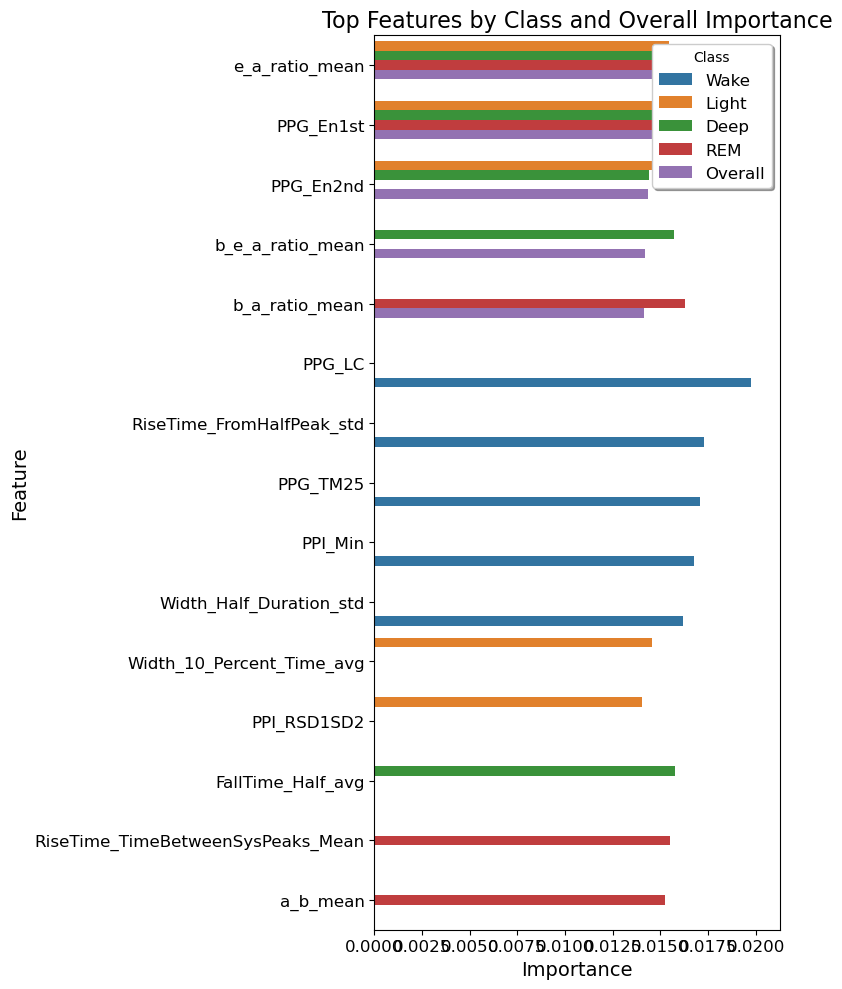

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting with the combined DataFrame
# Define the custom palette using seaborn's "deep" palette
deep_palette = sns.color_palette()
custom_palette = {
    'Wake': deep_palette[0],  # Blue
    'Light': deep_palette[1],  # Orange
    'Deep': deep_palette[2],  # Green
    'REM': deep_palette[3],  # Red
    'Overall': deep_palette[4]  # Purple
}

plt.figure(figsize=(8, 10))
barplot = sns.barplot(
    data=top_features_combined_sorted,
    x='Importance',
    y='Feature',
    hue='Class',
    palette=custom_palette
)
# Improve the aesthetics and legibility of the plot
plt.title('Top Features by Class and Overall Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust the legend to match the desired order and colors
handles, labels = barplot.get_legend_handles_labels()
desired_order = ['Wake', 'Light', 'Deep', 'REM', 'Overall']
ordered_handles = [handles[labels.index(lbl)] for lbl in desired_order]

# Create a new legend with the desired order and colors
plt.legend(ordered_handles, desired_order, title='Class', fontsize=12, frameon=True, shadow=True, fancybox=True)

plt.tight_layout()
plt.show()

In [32]:
feature_names = top_features_combined_sorted['Feature'].unique()

In [33]:
feature_names

array(['e_a_ratio_mean', 'PPG_En1st', 'PPG_En2nd', 'b_e_a_ratio_mean',
       'b_a_ratio_mean', 'PPG_LC', 'RiseTime_FromHalfPeak_std',
       'PPG_TM25', 'PPI_Min', 'Width_Half_Duration_std',
       'Width_10_Percent_Time_avg', 'PPI_RSD1SD2', 'FallTime_Half_avg',
       'RiseTime_TimeBetweenSysPeaks_Mean', 'a_b_mean'], dtype=object)

In [35]:
top_features = X_resampled[['e_a_ratio_mean', 'PPG_En1st', 'PPG_En2nd', 'b_e_a_ratio_mean',
       'b_a_ratio_mean', 'PPG_LC', 'RiseTime_FromHalfPeak_std',
       'PPG_TM25', 'PPI_Min', 'Width_Half_Duration_std',
       'Width_10_Percent_Time_avg', 'PPI_RSD1SD2', 'FallTime_Half_avg',
       'RiseTime_TimeBetweenSysPeaks_Mean', 'a_b_mean']]

/var/folders/z_/s9qt2h1j7vl1rn3qw1cy9n9h0000gn/T/ipykernel_2067/4216837498.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['class'] = y_resampled  # Add the class labels


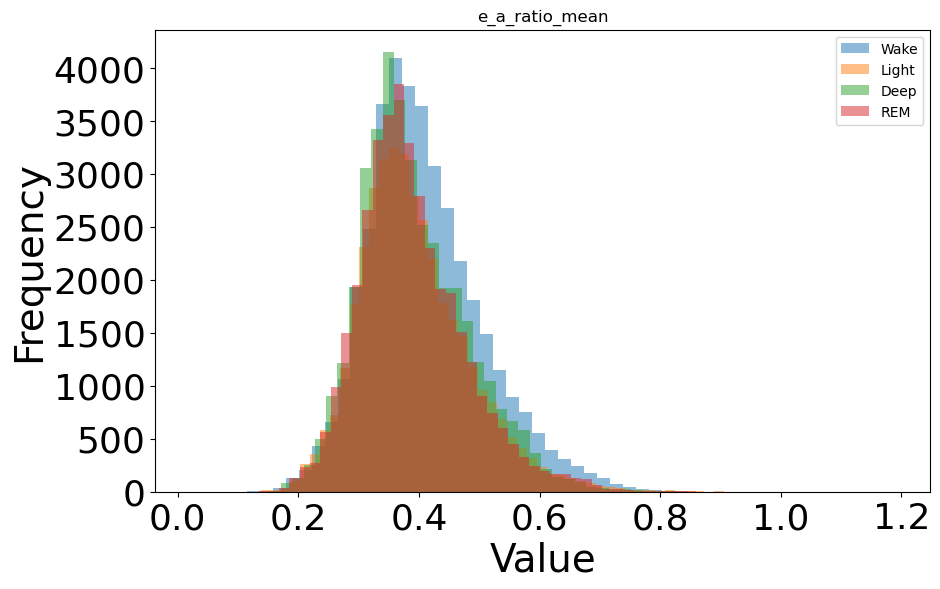

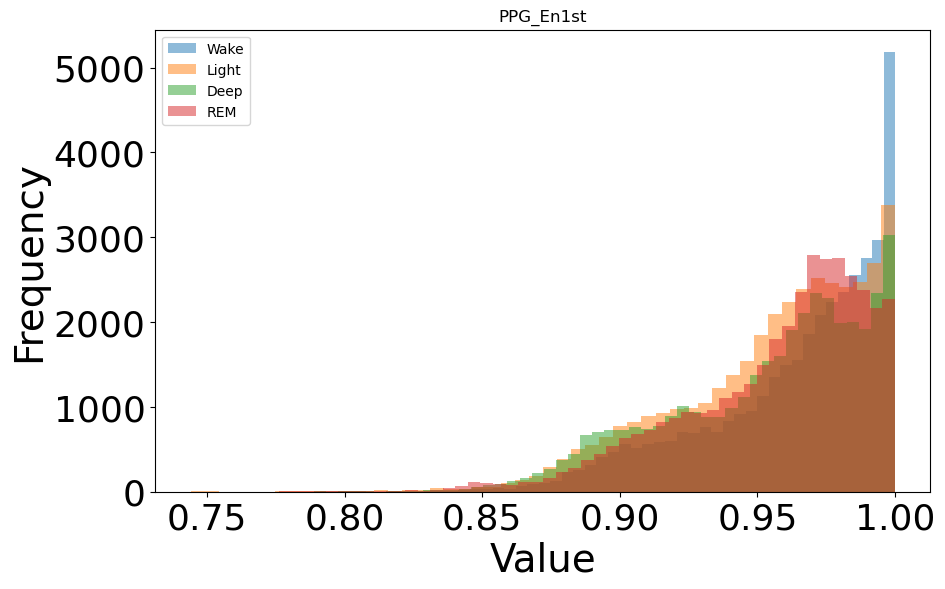

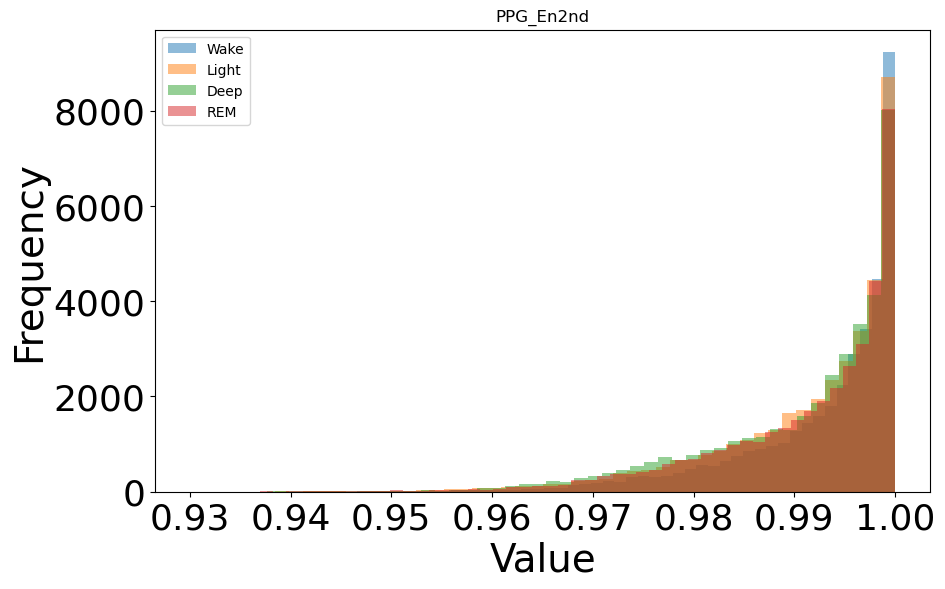

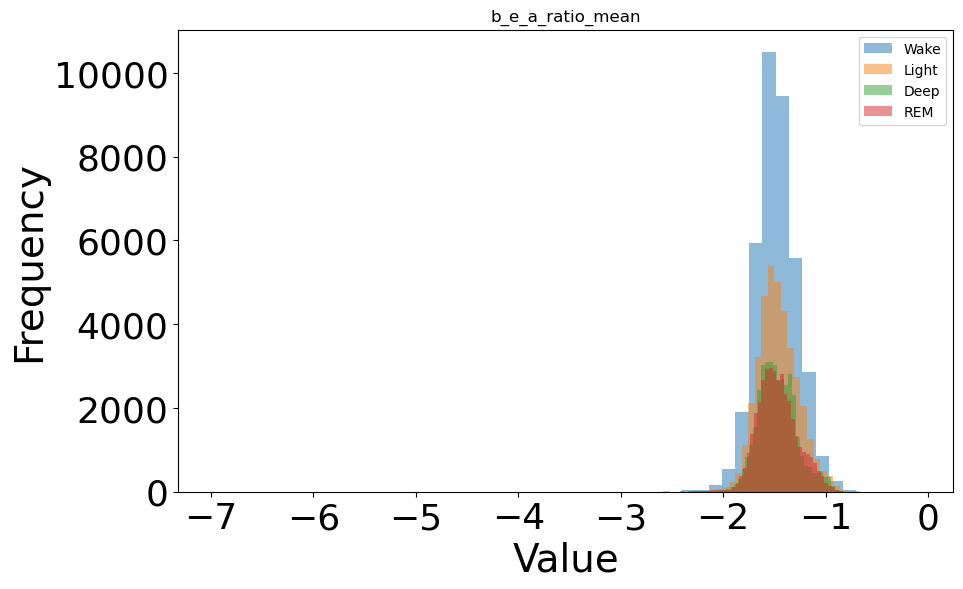

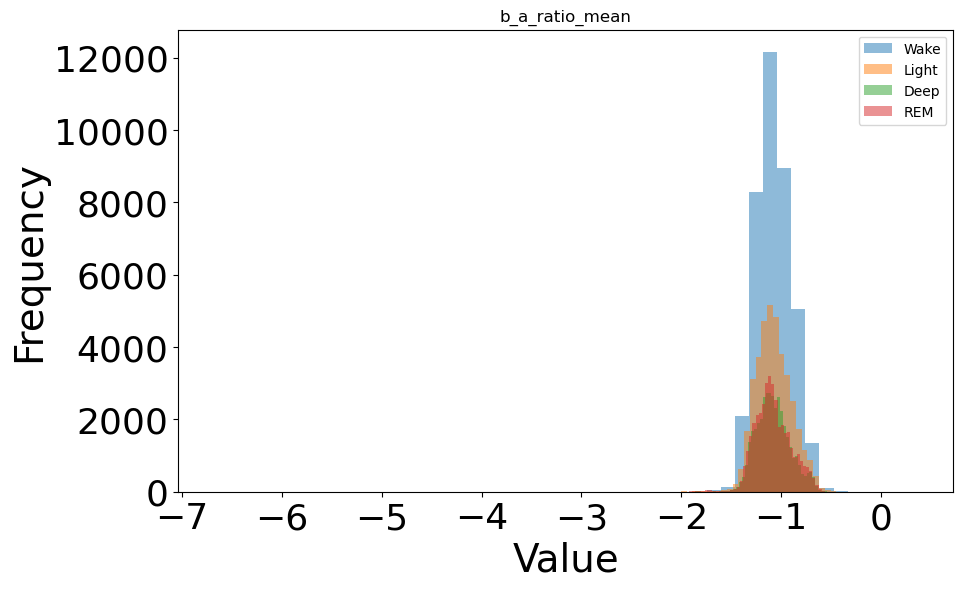

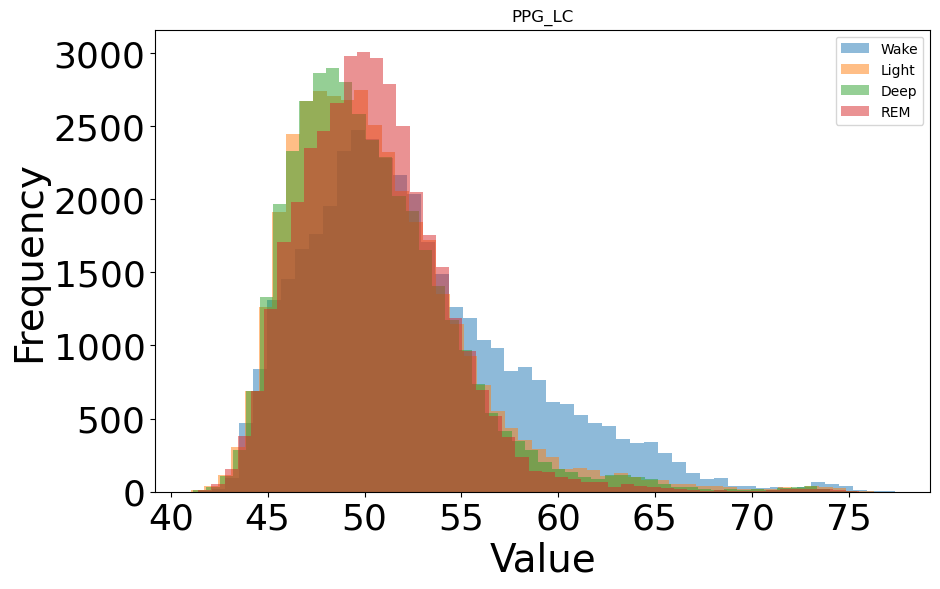

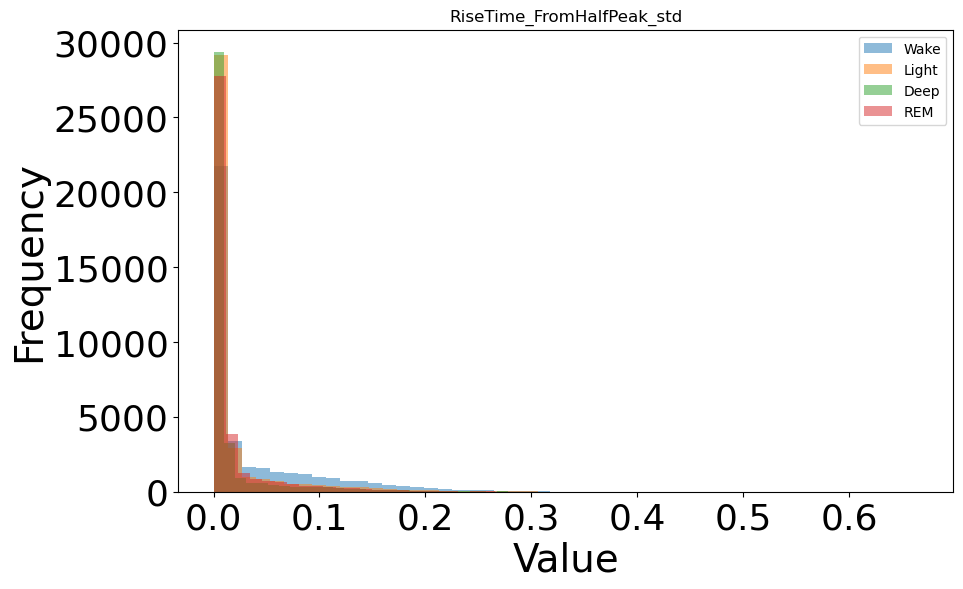

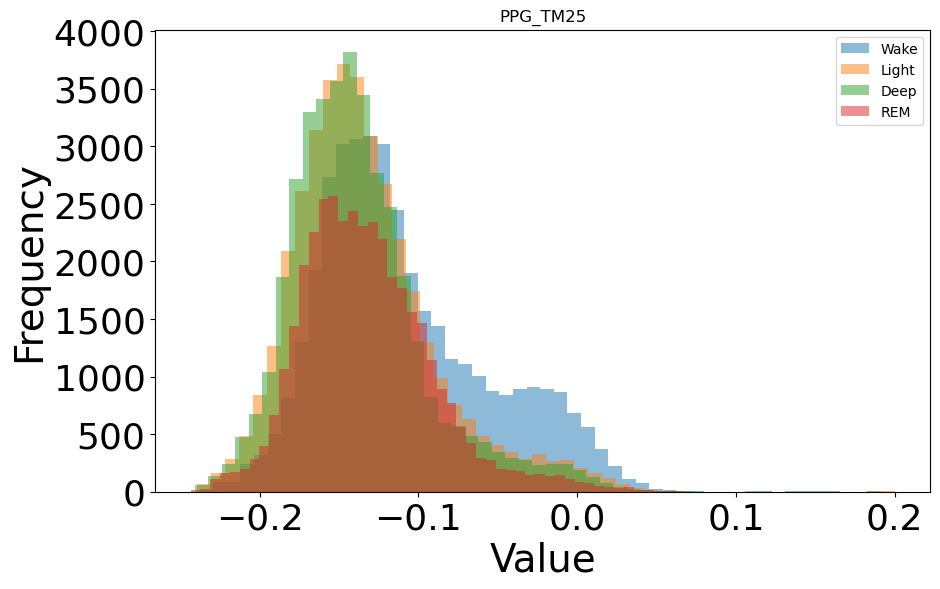

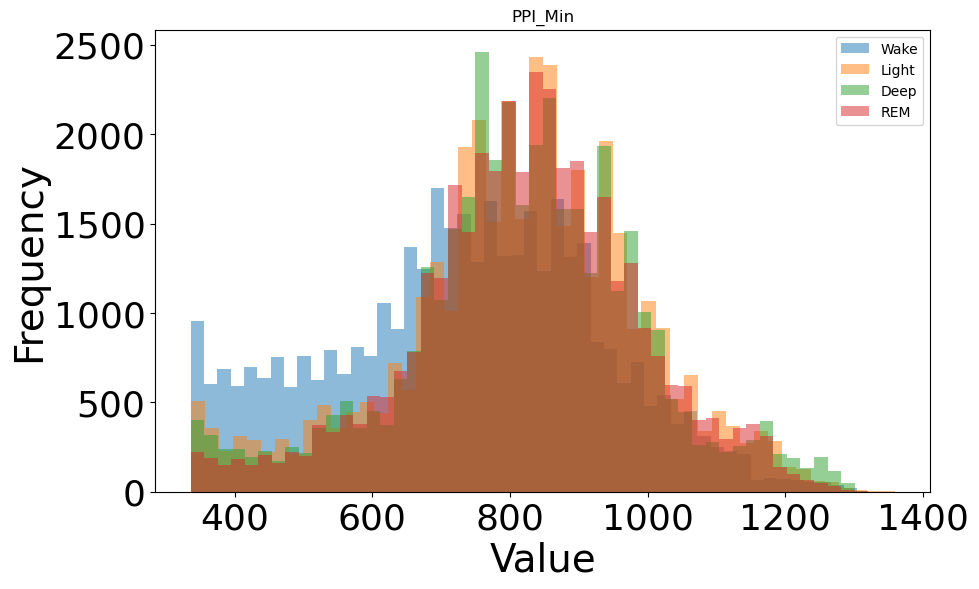

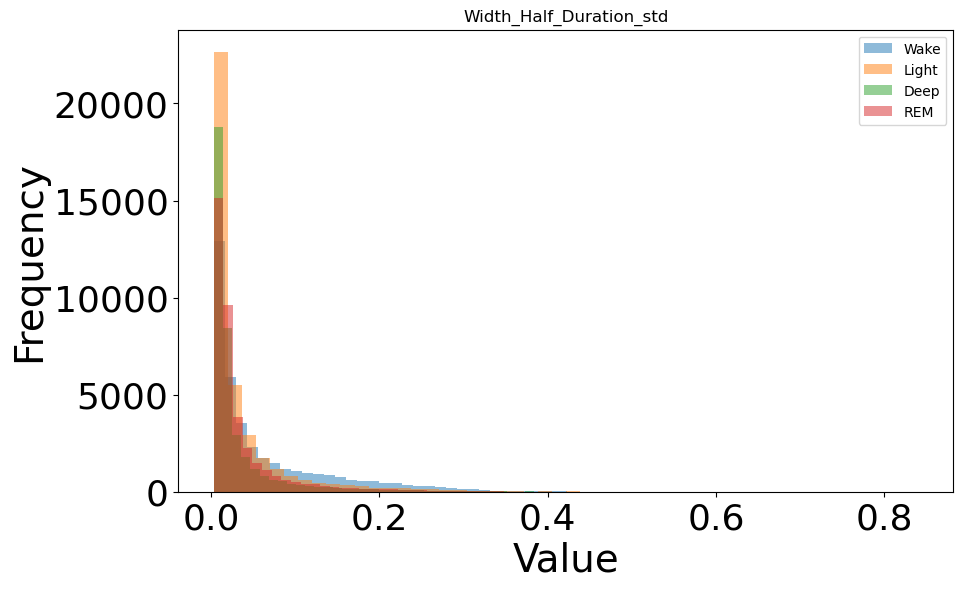

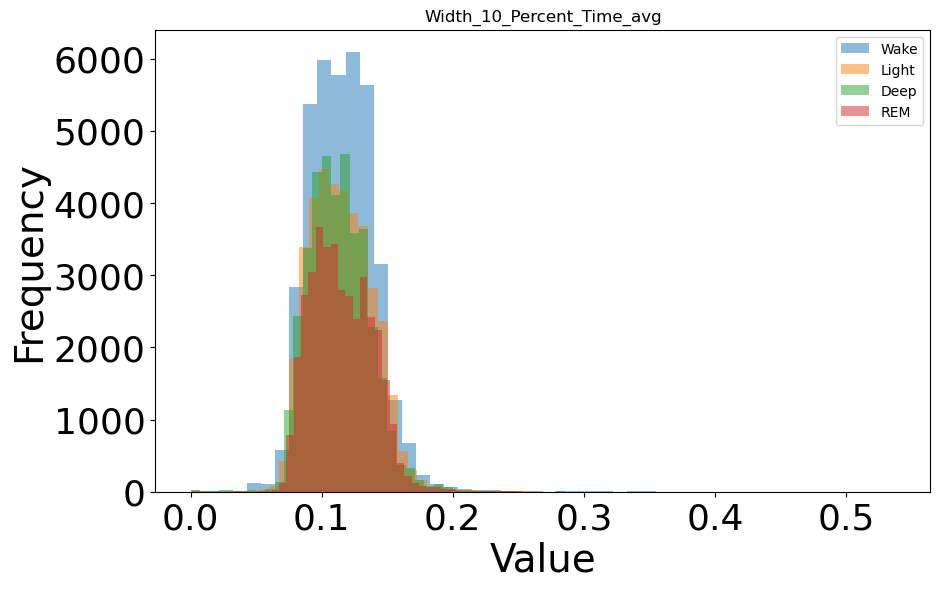

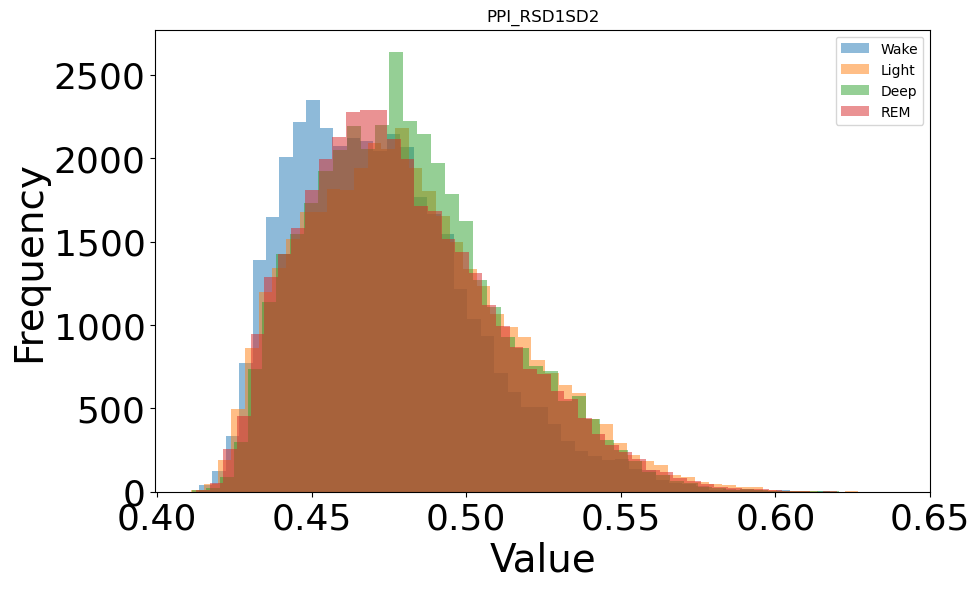

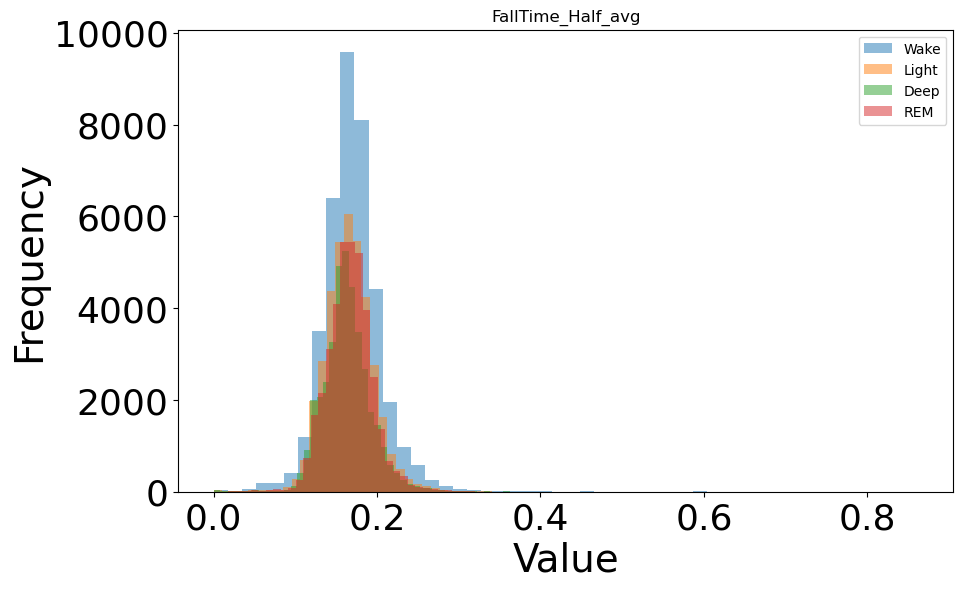

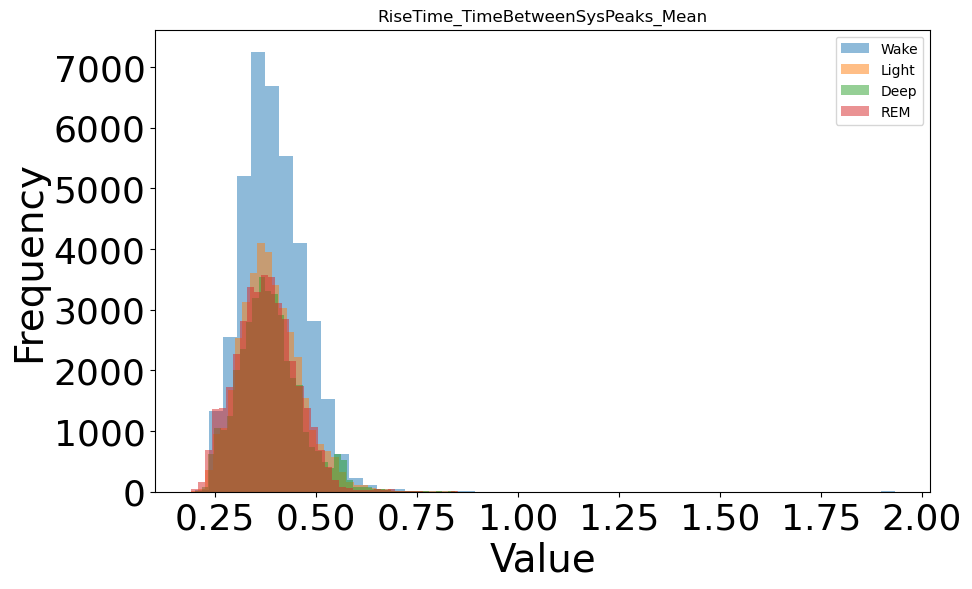

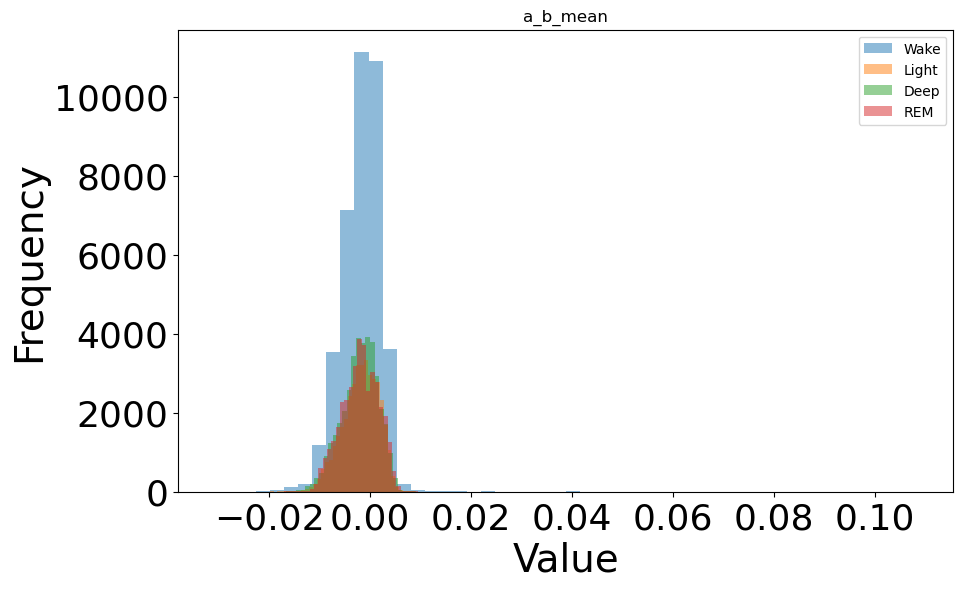

In [36]:
# Define a dictionary to map class values to sleep stages
class_labels = {
    0: "Wake",
    1: "Light",
    2: "Deep",
    3: "REM"
}

# Plot histograms for each feature
# Assuming 'top_features' DataFrame and 'y_resampled' Series are already defined
top_features['class'] = y_resampled  # Add the class labels

# Exclude the 'class' column when getting feature names
feature_names = top_features.drop(columns='class').columns

for feature in feature_names:
    plt.figure(figsize=(10, 6))
    # Get unique class values from the 'class' column
    for class_value in np.unique(top_features['class']):
        # Subset the data for the current class
        subset = top_features[top_features['class'] == class_value]
        # Plot histogram and use the class_labels dictionary to get the correct label
        plt.hist(subset[feature], bins=50, alpha=0.5, label=class_labels[class_value])
    plt.title(f'{feature}')
    plt.xlabel('Value', fontsize = 28)
    plt.ylabel('Frequency', fontsize = 28)
    plt.xticks (fontsize = 26)
    plt.yticks (fontsize = 26)
    plt.legend()
    plt.show()


/var/folders/z_/s9qt2h1j7vl1rn3qw1cy9n9h0000gn/T/ipykernel_2067/1919937463.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_features['class'] = top_features['class'].map(class_mapping)


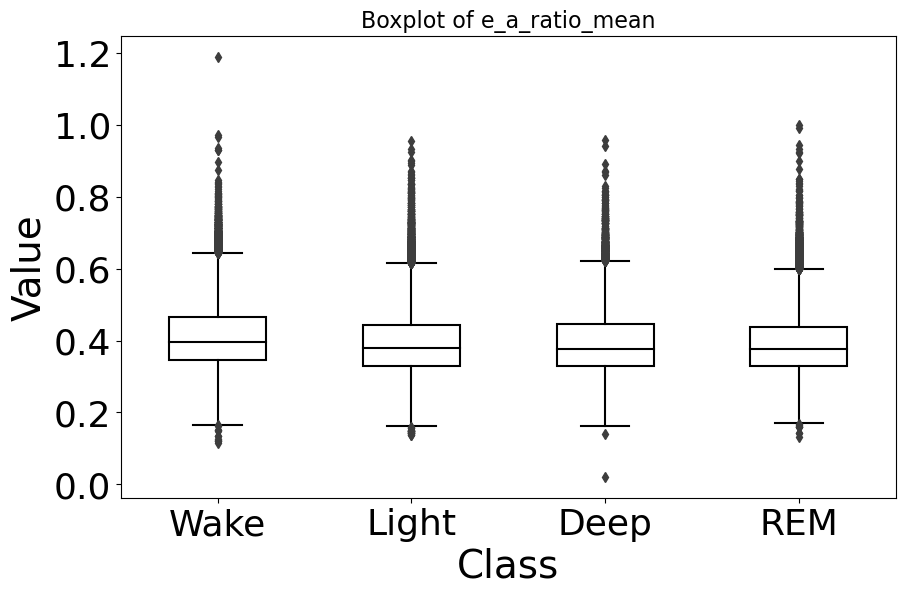

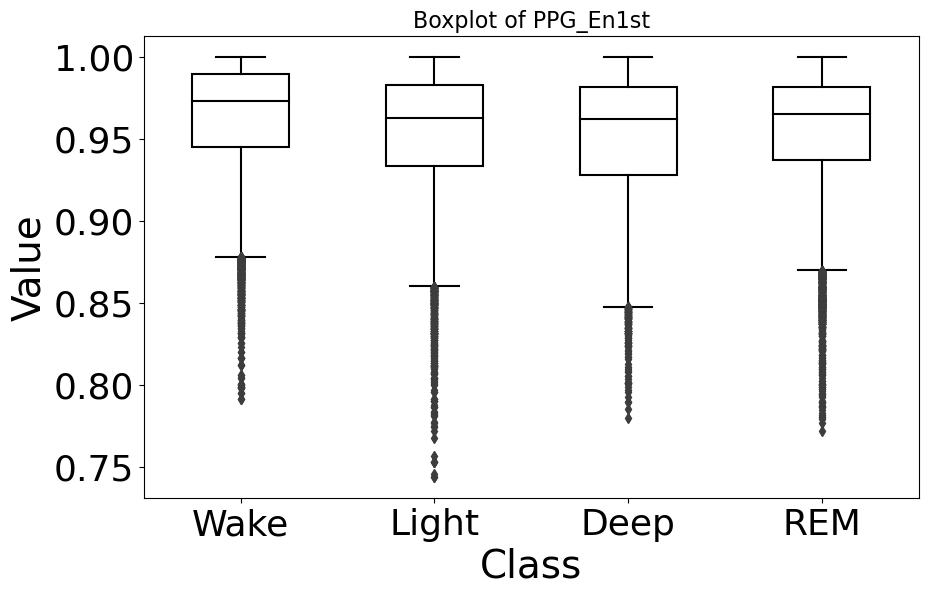

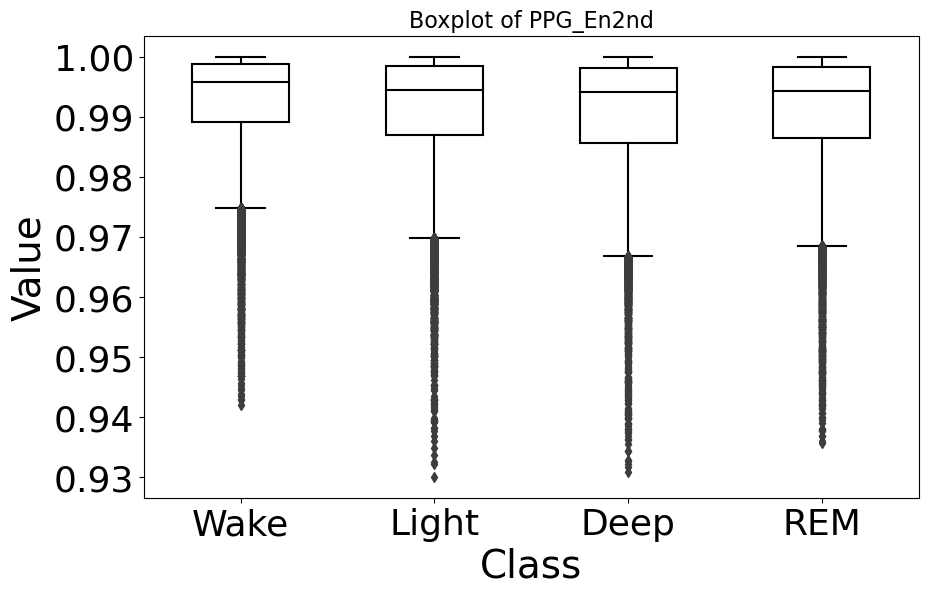

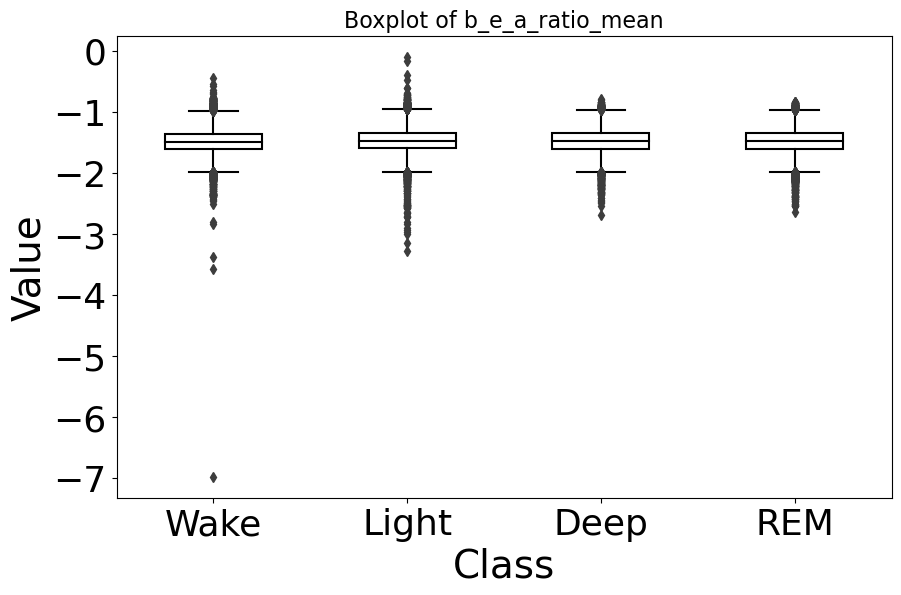

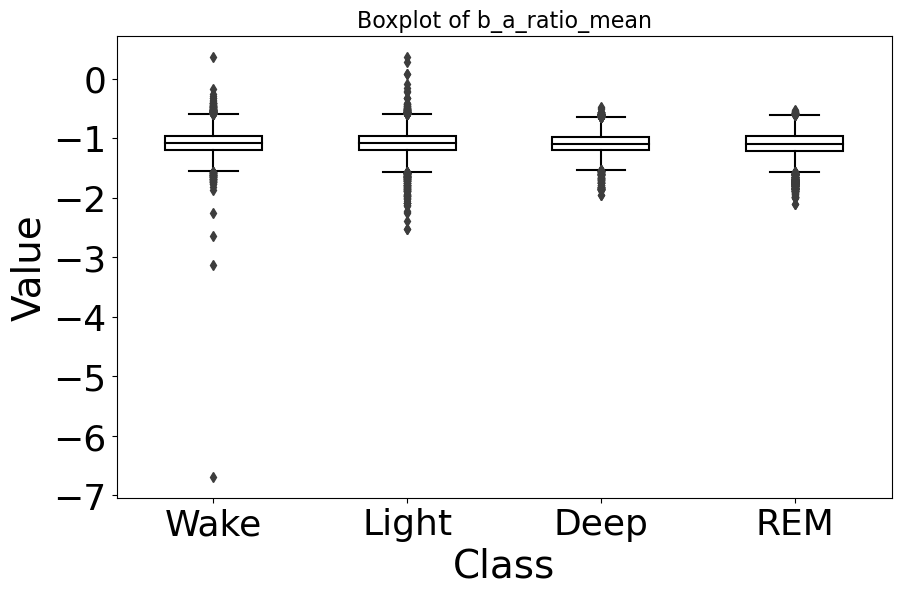

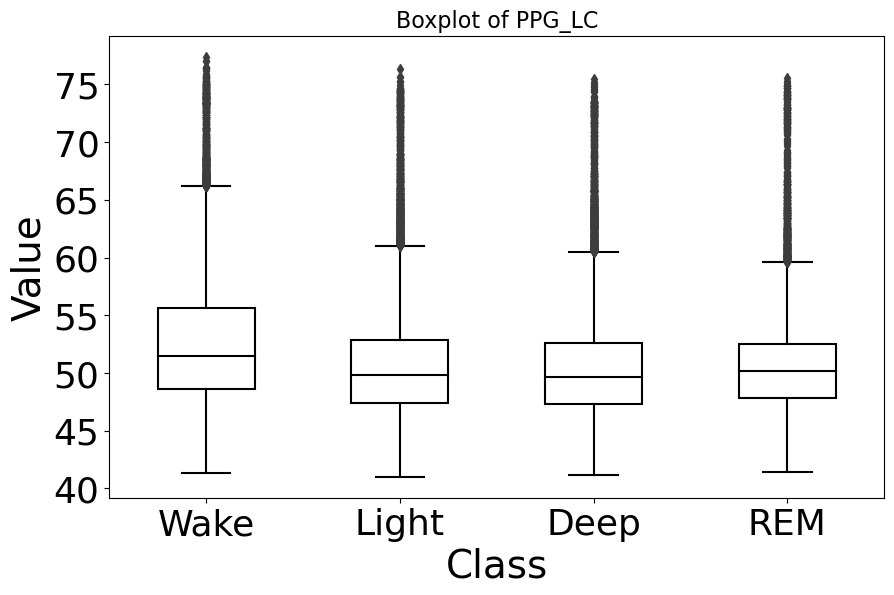

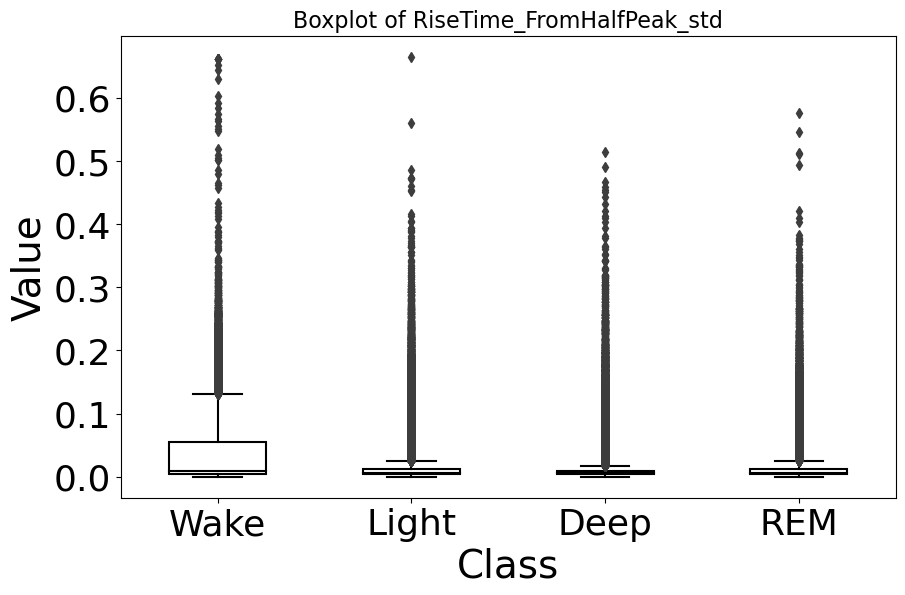

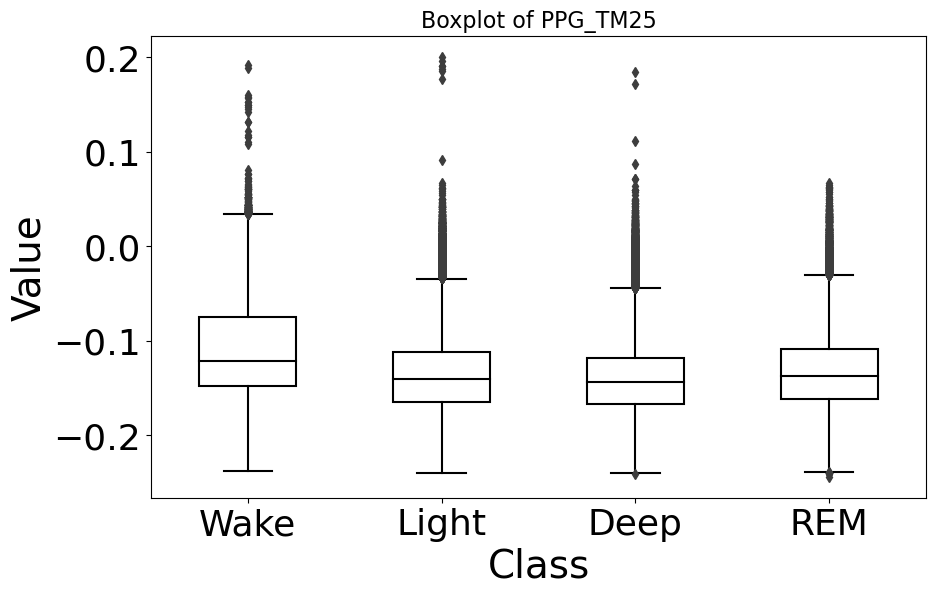

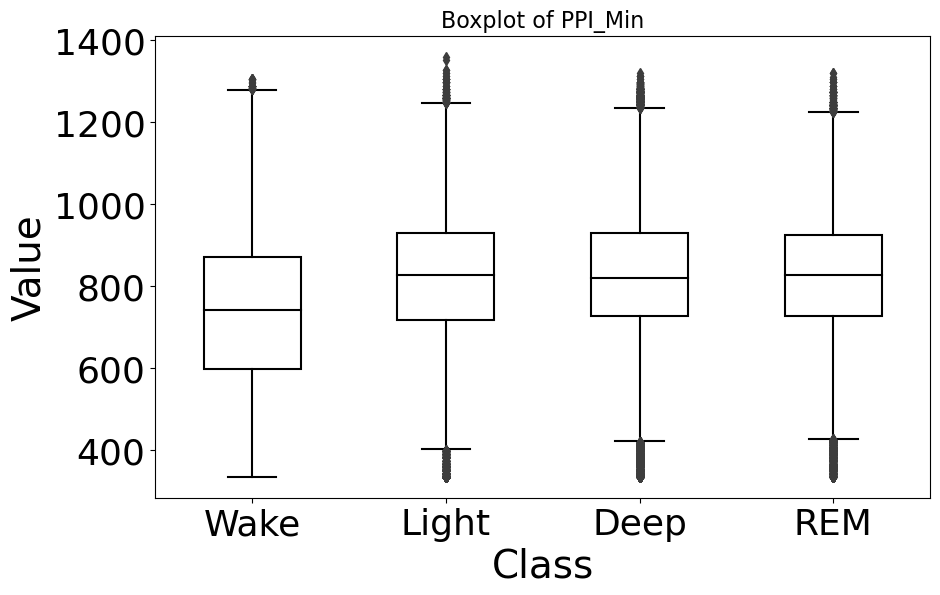

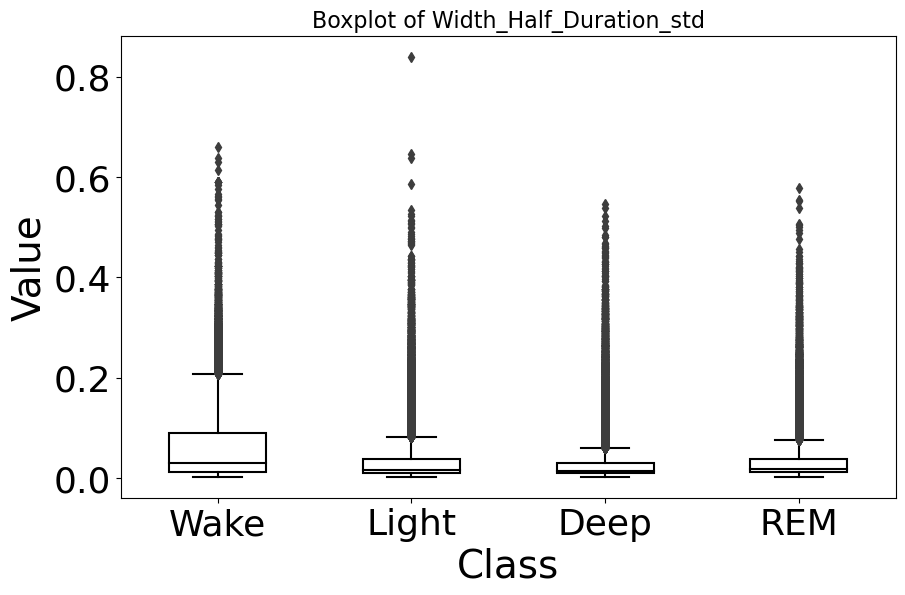

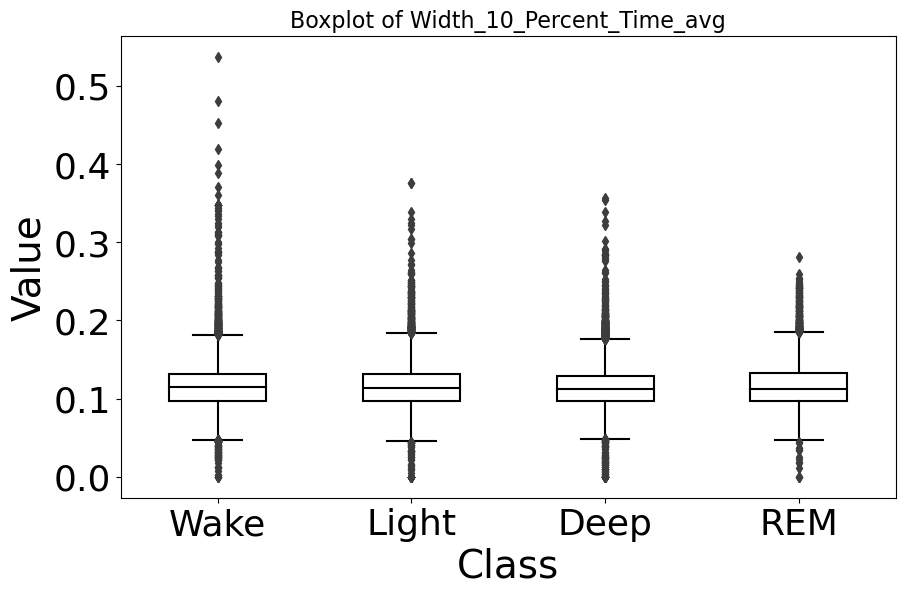

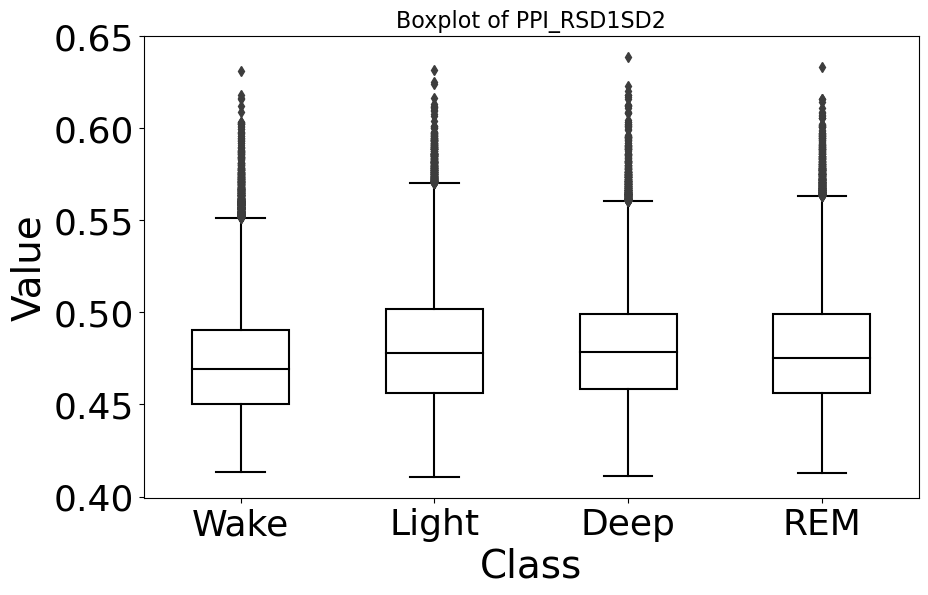

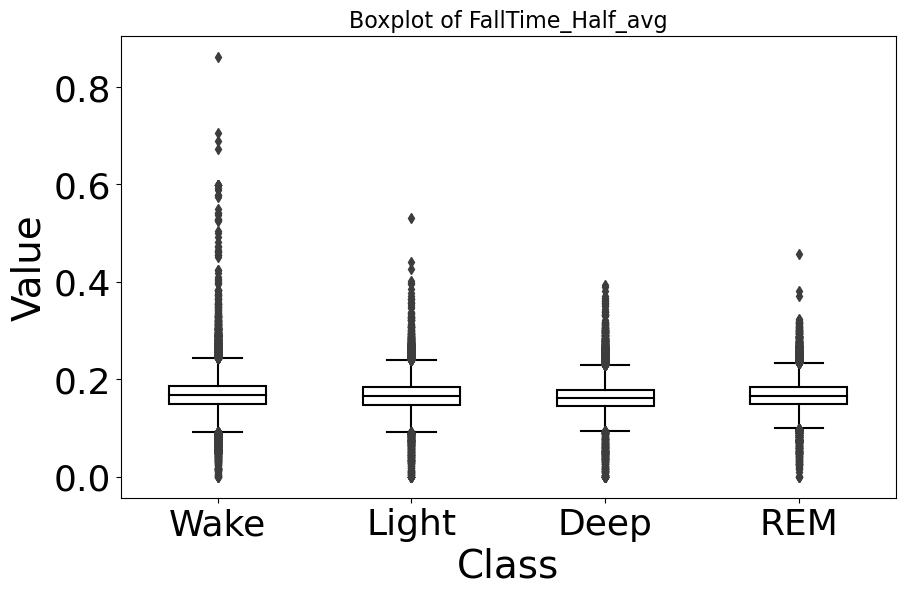

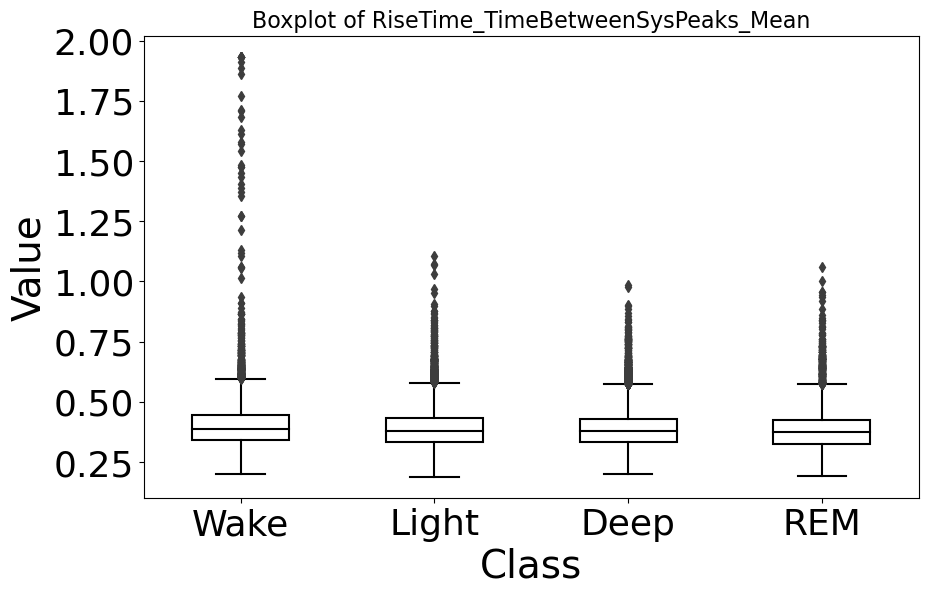

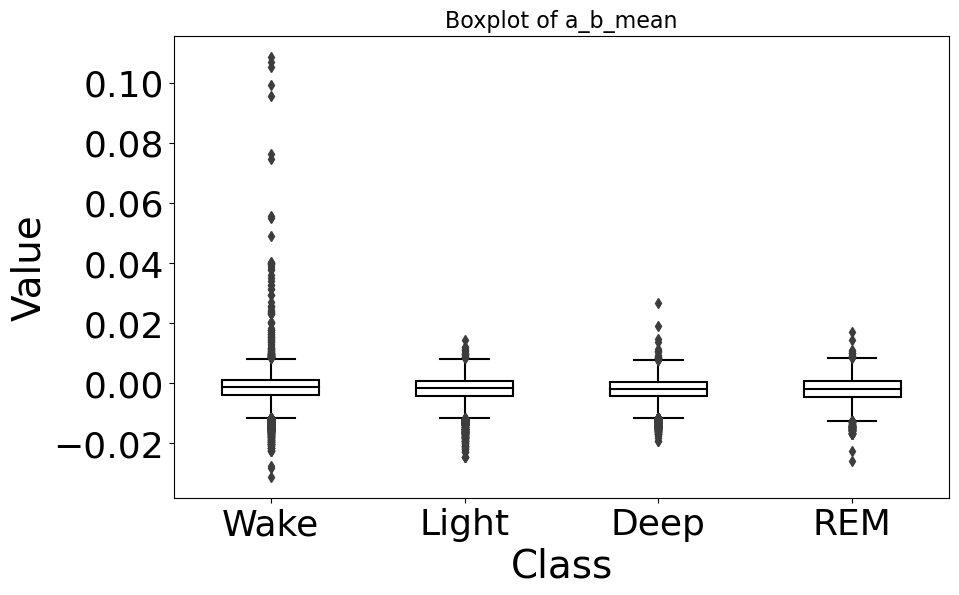

In [37]:
# First, map your 'class' column to the desired string labels
# Create a dictionary to map the class values to sleep stages
class_mapping = {0: "Wake", 1: "Light", 2: "Deep", 3: "REM"}

# Replace the numerical class labels in your DataFrame with the string labels
top_features['class'] = top_features['class'].map(class_mapping)

feature_names = top_features.drop(columns='class').columns  # assuming 'class' column exists

for feature in feature_names:
    plt.figure(figsize=(10, 6))
    # Create a boxplot
    sns.boxplot(x='class', y=feature, data=top_features,
                width=0.5,
                fliersize=5,
                linewidth=1.5,
                boxprops={'facecolor': 'white', 'edgecolor': 'black'},
                whiskerprops={'color': 'black'},
                capprops={'color': 'black'},
                medianprops={'color': 'black'})

    plt.title(f'Boxplot of {feature}', fontsize=16)
    plt.xlabel('Class', fontsize=28)
    plt.ylabel('Value', fontsize=28)

    # Set x-ticks labels according to the class labels
    plt.xticks(fontsize=26)
    plt.yticks(fontsize=26)

    plt.show()


In [37]:
top_features_class_0

index                    Feature  Class 0 Average  Class 1 Average  \
0     92                     PPG_LC         0.019777         0.011790   
1     17  RiseTime_FromHalfPeak_std         0.017311         0.009570   
2     37                   PPG_TM25         0.017064         0.010775   
3     75                    PPI_Min         0.016749         0.009969   
4     21    Width_Half_Duration_std         0.016210         0.008617   

   Class 2 Average  Class 3 Average  Overall Importance (Mean)  
0         0.009404         0.011651                   0.013156  
1         0.009476         0.007627                   0.010996  
2         0.010586         0.010162                   0.012147  
3         0.009125         0.010654                   0.011624  
4         0.008434         0.008096                   0.010339

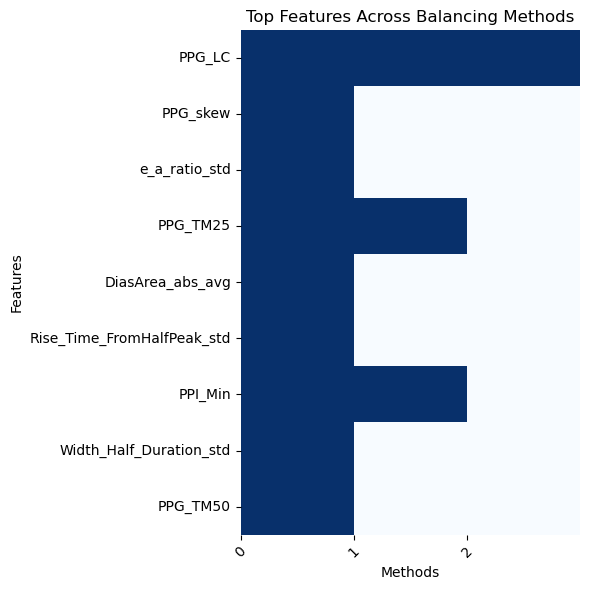

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppose you have the following dictionary of features and the methods they are important in:
features_dict = {
    'PPG_LC': ['None', 'SMOTE', 'RUS'],
    'PPG_skew': ['None'],
    'e_a_ratio_std': ['None'],
    'PPG_TM25': ['None', 'SMOTE', 'RUS'],
    'DiasArea_abs_avg': ['None'],
    'Rise_Time_FromHalfPeak_std': ['SMOTE'], 
    'PPG_TM25': ['SMOTE', 'RUS'], 
    'PPI_Min': ['SMOTE', 'RUS'], 
    'Width_Half_Duration_std': ['SMOTE'], 
    'PPG_TM50': ['RUS']
    # ... add all other features
}

# Convert to DataFrame for a heatmap
features_df = pd.DataFrame.from_dict(features_dict, orient='index')
features_df = features_df.fillna(0)
features_df = features_df.applymap(lambda x: 1 if x != 0 else 0)

# Plot the heatmap
plt.figure(figsize=(6,6))
sns.heatmap(features_df, cmap='Blues', cbar=False, yticklabels=True)
plt.xlabel('Methods')
plt.ylabel('Features')
plt.title('Top Features Across Balancing Methods')
plt.xticks(ticks=range(len(features_df.columns)), labels=features_df.columns, rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


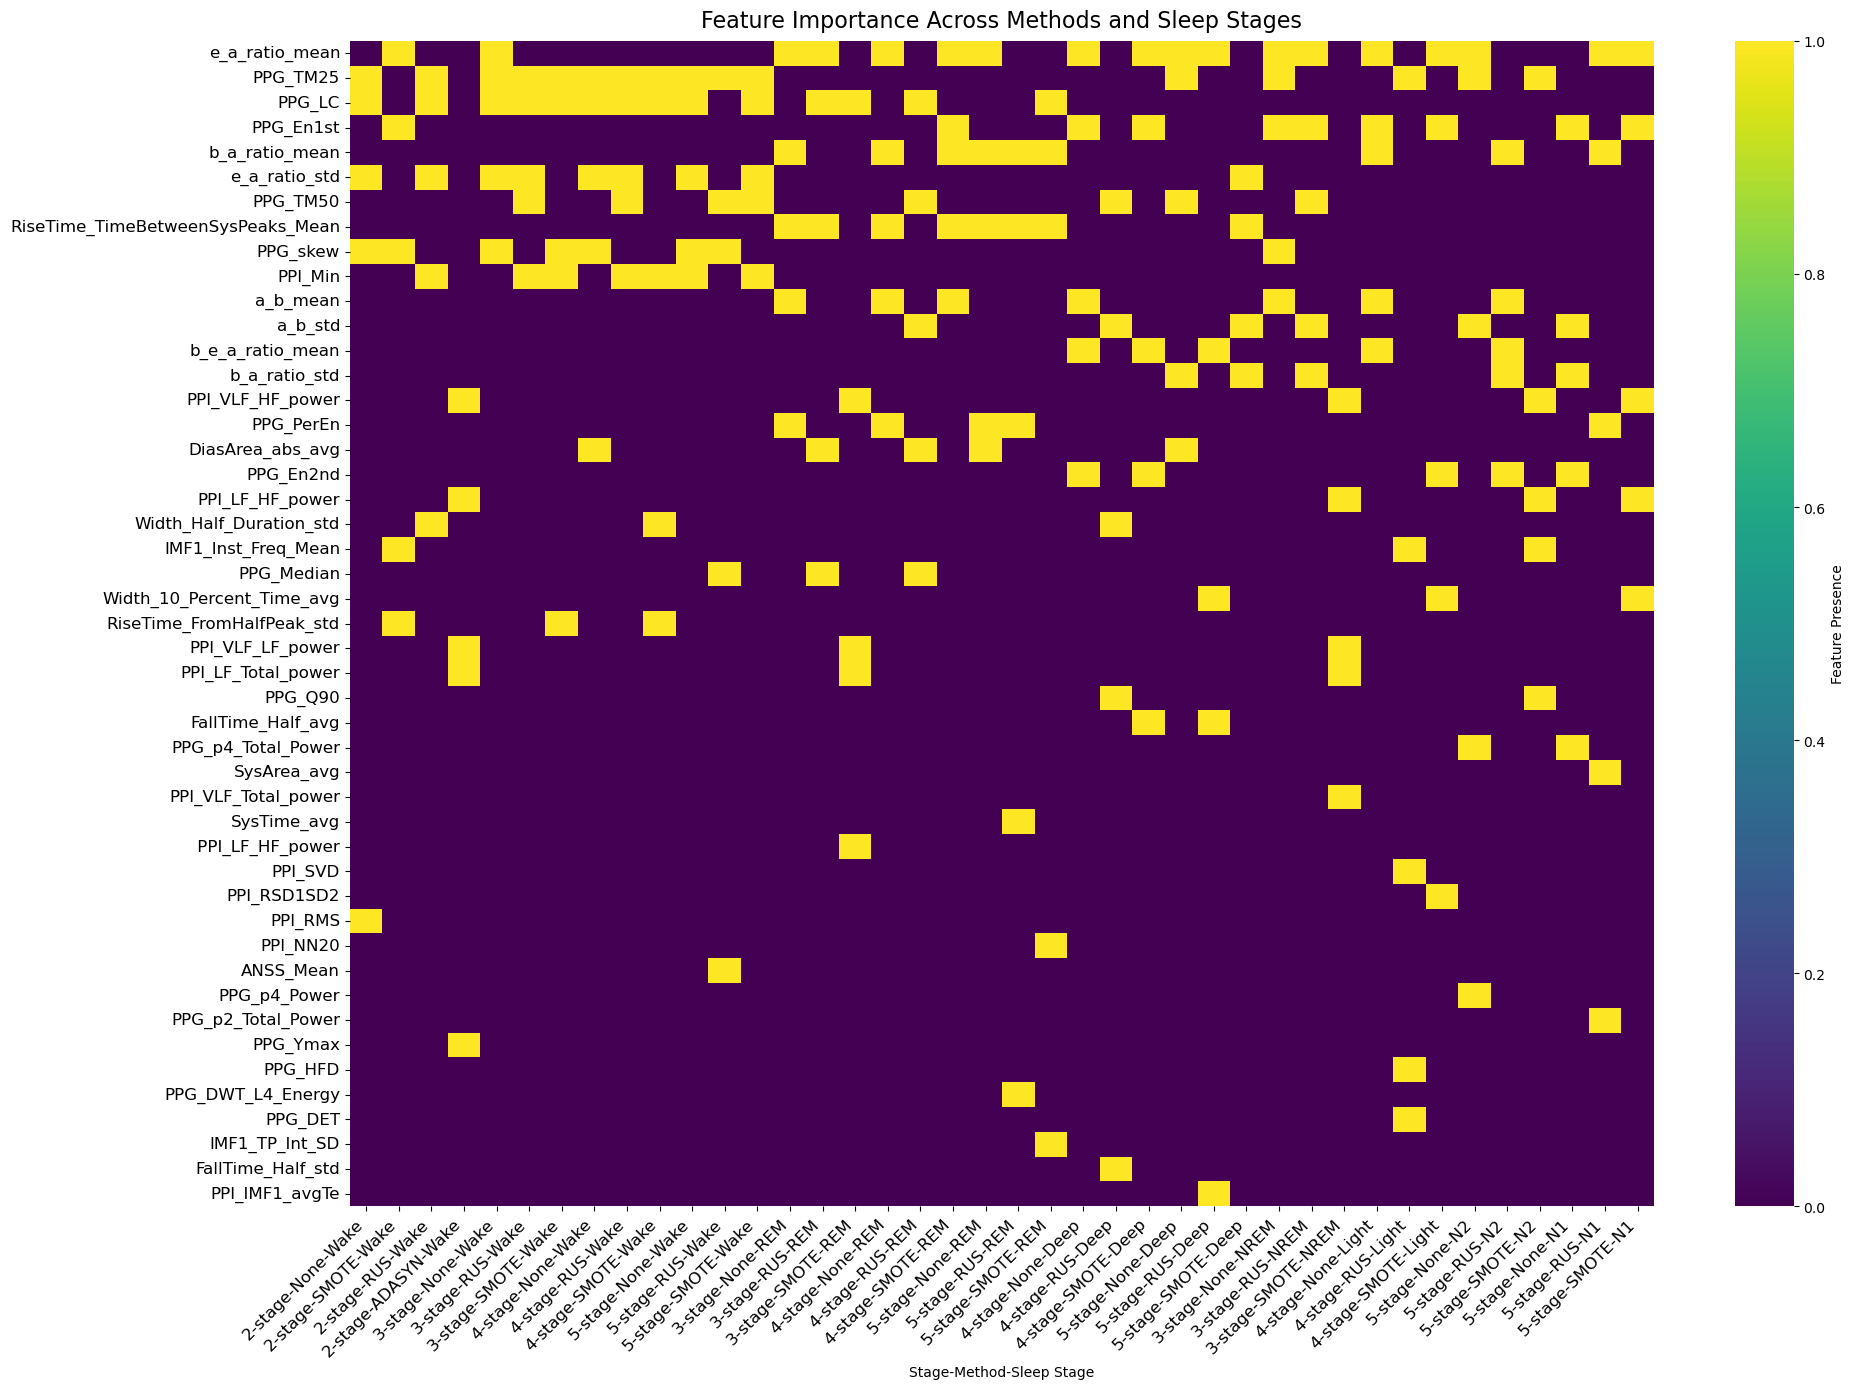

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data (extend this dictionary based on your actual data)
features_by_stage_and_method = {
    ('2-stage', 'None', 'Wake'): ['PPG_skew', 'PPG_TM25', 'PPG_LC', 'e_a_ratio_std', 'PPI_RMS'],
    ('2-stage', 'SMOTE', 'Wake'): ['e_a_ratio_mean', 'PPG_skew', 'RiseTime_FromHalfPeak_std', 'IMF1_Inst_Freq_Mean', 'PPG_En1st'],
    ('2-stage', 'RUS', 'Wake'): ['Width_Half_Duration_std', 'PPI_Min', 'e_a_ratio_std', 'PPG_LC', 'PPG_TM25'],
    ('2-stage', 'ADASYN', 'Wake'): ['PPI_LF_HF_power', 'PPI_VLF_HF_power', 'PPI_LF_Total_power', 'PPI_VLF_LF_power', 'PPG_Ymax'],
    ('3-stage', 'None', 'Wake'): ['e_a_ratio_mean', 'PPG_LC', 'PPG_skew', 'e_a_ratio_std', 'PPG_TM25'],
    ('3-stage', 'RUS', 'Wake'): ['PPG_LC', 'PPG_TM50', 'e_a_ratio_std', 'PPI_Min', 'PPG_TM25'],
    ('3-stage', 'SMOTE', 'Wake'): ['PPG_LC', 'PPI_Min', 'PPG_skew', 'RiseTime_FromHalfPeak_std', 'PPG_TM25'],
    ('4-stage', 'None', 'Wake'): ['PPG_LC', 'PPG_skew', 'e_a_ratio_std', 'PPG_TM25', 'DiasArea_abs_avg'],
    ('4-stage', 'RUS', 'Wake'): ['PPG_TM50', 'PPG_LC', 'PPG_TM25', 'e_a_ratio_std', 'PPI_Min'],
    ('4-stage', 'SMOTE', 'Wake'): ['PPG_LC', 'RiseTime_FromHalfPeak_std', 'PPG_TM25', 'PPI_Min', 'Width_Half_Duration_std'],
    ('5-stage', 'None', 'Wake'): ['PPG_TM25', 'PPG_LC', 'PPG_skew', 'PPI_Min', 'e_a_ratio_std'],
    ('5-stage', 'RUS', 'Wake'): ['PPG_TM25', 'PPG_Median', 'PPG_skew', 'PPG_TM50', 'ANSS_Mean'],
    ('5-stage', 'SMOTE', 'Wake'): ['PPG_TM25', 'PPG_TM50', 'e_a_ratio_std', 'PPG_LC', 'PPI_Min'],
    ('3-stage', 'None', 'REM'): ['e_a_ratio_mean', 'RiseTime_TimeBetweenSysPeaks_Mean', 'a_b_mean', 'b_a_ratio_mean', 'PPG_PerEn'],
    ('3-stage', 'RUS', 'REM'): ['PPG_LC', 'PPG_Median', 'e_a_ratio_mean', 'DiasArea_abs_avg', 'RiseTime_TimeBetweenSysPeaks_Mean'],
    ('3-stage', 'SMOTE', 'REM'): [' PPI_LF_HF_power', 'PPI_VLF_LF_power', 'PPI_LF_Total_power', 'PPI_VLF_HF_power', 'PPG_LC'],
    ('4-stage', 'None', 'REM'): ['e_a_ratio_mean', 'a_b_mean', 'b_a_ratio_mean', 'RiseTime_TimeBetweenSysPeaks_Mean', 'PPG_PerEn'],
    ('4-stage', 'RUS', 'REM'): ['PPG_TM50', 'PPG_LC', 'PPG_Median', 'a_b_std', 'DiasArea_abs_avg'],
    ('4-stage', 'SMOTE', 'REM'): ['e_a_ratio_mean', 'PPG_En1st', 'b_a_ratio_mean', 'RiseTime_TimeBetweenSysPeaks_Mean', 'a_b_mean'],
    ('5-stage', 'None', 'REM'): ['e_a_ratio_mean', 'RiseTime_TimeBetweenSysPeaks_Mean', 'DiasArea_abs_avg', 'PPG_PerEn', 'b_a_ratio_mean'],
    ('5-stage', 'RUS', 'REM'): ['RiseTime_TimeBetweenSysPeaks_Mean', 'b_a_ratio_mean', 'PPG_PerEn', 'SysTime_avg', 'PPG_DWT_L4_Energy'],
    ('5-stage', 'SMOTE', 'REM'): ['PPG_LC', 'RiseTime_TimeBetweenSysPeaks_Mean', 'IMF1_TP_Int_SD', 'b_a_ratio_mean', 'PPI_NN20'],
    ('4-stage', 'None', 'Deep'): ['e_a_ratio_mean', 'PPG_En1st', 'b_e_a_ratio_mean', 'a_b_mean', 'PPG_En2nd'],
    ('4-stage', 'RUS', 'Deep'): ['PPG_TM50', 'PPG_Q90', 'a_b_std', 'FallTime_Half_std', 'Width_Half_Duration_std'],
    ('4-stage', 'SMOTE', 'Deep'):  ['e_a_ratio_mean', 'PPG_En1st', 'PPG_En2nd', 'b_e_a_ratio_mean', 'FallTime_Half_avg'],
    ('5-stage', 'None', 'Deep'): ['e_a_ratio_mean', 'PPG_TM25', 'b_a_ratio_std', 'DiasArea_abs_avg', 'PPG_TM50'],
    ('5-stage', 'RUS', 'Deep'): ['b_e_a_ratio_mean', 'e_a_ratio_mean', 'PPI_IMF1_avgTe', 'FallTime_Half_avg', 'Width_10_Percent_Time_avg'],
    ('5-stage', 'SMOTE', 'Deep'): ['e_a_ratio_std', 'a_b_std', 'RiseTime_TimeBetweenSysPeaks_Mean', 'b_a_ratio_std'],
    ('3-stage', 'None', 'NREM'): ['e_a_ratio_mean', 'PPG_skew', 'PPG_TM25', 'a_b_mean', 'PPG_En1st'],
    ('3-stage', 'RUS', 'NREM'): ['PPG_TM50', 'e_a_ratio_mean', 'a_b_std', 'PPG_En1st', 'b_a_ratio_std'],
    ('3-stage', 'SMOTE', 'NREM'):['PPI_LF_HF_power', 'PPI_VLF_LF_power', 'PPI_LF_Total_power', 'PPI_VLF_HF_power', 'PPI_VLF_Total_power'],
    ('4-stage', 'None', 'Light'):['e_a_ratio_mean', 'PPG_En1st', 'b_e_a_ratio_mean', 'a_b_mean', 'b_a_ratio_mean'],
    ('4-stage', 'RUS', 'Light'):['PPG_TM25', 'PPG_DET', 'PPG_HFD', 'IMF1_Inst_Freq_Mean', 'PPI_SVD'],
    ('4-stage', 'SMOTE', 'Light'): ['e_a_ratio_mean', 'PPG_En1st', 'PPG_En2nd', 'Width_10_Percent_Time_avg', 'PPI_RSD1SD2'],
    ('5-stage', 'None', 'N2'): ['e_a_ratio_mean', 'PPG_TM25', 'a_b_std', 'PPG_p4_Total_Power', 'PPG_p4_Power'],
    ('5-stage', 'RUS', 'N2'): ['b_a_ratio_mean', 'b_e_a_ratio_mean', 'b_a_ratio_std', 'a_b_mean', 'PPG_En2nd'],
    ('5-stage', 'SMOTE', 'N2'): ['PPI_VLF_HF_power', 'PPI_LF_HF_power', 'PPG_TM25', 'IMF1_Inst_Freq_Mean', 'PPG_Q90'],
    ('5-stage', 'None', 'N1'):['a_b_std', 'PPG_p4_Total_Power', 'PPG_En1st', 'b_a_ratio_std', 'PPG_En2nd'],
    ('5-stage', 'RUS', 'N1'): ['b_a_ratio_mean', 'e_a_ratio_mean', 'SysArea_avg', 'PPG_PerEn', 'PPG_p2_Total_Power'],
    ('5-stage', 'SMOTE', 'N1'):['PPI_VLF_HF_power', 'PPI_LF_HF_power', 'e_a_ratio_mean', 'PPG_En1st', 'Width_10_Percent_Time_avg'] 
}


# Extract unique combinations of stage, method, and sleep stage that actually have data
column_tuples = list(features_by_stage_and_method.keys())

# Create a multi-index from these tuples
multi_index = pd.MultiIndex.from_tuples(column_tuples, names=["Stage", "Method", "Sleep Stage"])

# Gather all features from the data
all_features = set()
for features in features_by_stage_and_method.values():
    all_features.update(features)

# Sort features for consistent ordering
all_features = sorted(all_features)

# Initialize the DataFrame with zeros
feature_matrix = pd.DataFrame(0, index=all_features, columns=multi_index)

# Populate the DataFrame
for (stage, method, sleep_stage), features in features_by_stage_and_method.items():
    feature_matrix.loc[features, (stage, method, sleep_stage)] = 1

# Sum the total importance for each feature across all configurations
feature_matrix['Total Importance'] = feature_matrix.sum(axis=1)

# Sort the matrix based on total importance
feature_matrix_sorted = feature_matrix.sort_values('Total Importance', ascending=False)

# Plotting
plt.figure(figsize=(20, 14))
sns.heatmap(feature_matrix_sorted.iloc[:, :-1], cmap='viridis', cbar_kws={'label': 'Feature Presence'})
plt.title('Feature Importance Across Methods and Sleep Stages', fontsize = 16, pad = 10)
plt.xticks(rotation=45, ha='right', fontsize = 12)
plt.yticks(rotation=0, fontsize = 12)
plt.tight_layout()
plt.show()

# Wake

In [106]:
features_by_stage_and_method = {
    ('2-stage', 'None'): ['PPG_skew', 'PPG_TM25', 'PPG_LC', 'e_a_ratio_std', 'PPI_RMS'],
    ('2-stage', 'SMOTE'): ['e_a_ratio_mean', 'PPG_skew', 'RiseTime_FromHalfPeak_std', 'IMF1_Inst_Freq_Mean', 'PPG_En1st'],
    ('2-stage', 'RUS'): ['Width_Half_Duration_std', 'PPI_Min', 'e_a_ratio_std', 'PPG_LC', 'PPG_TM25'],
    ('2-stage', 'ADASYN'): ['PPI_LF_HF_power', 'PPI_VLF_HF_power', 'PPI_LF_Total_power', 'PPI_VLF_LF_power', 'PPG_Ymax'],
    ('3-stage', 'None'): ['e_a_ratio_mean', 'PPG_LC', 'PPG_skew', 'e_a_ratio_std', 'PPG_TM25'],
    ('3-stage', 'RUS'): ['PPG_LC', 'PPG_TM50', 'e_a_ratio_std', 'PPI_Min', 'PPG_TM25'],
    ('3-stage', 'SMOTE'): ['PPG_LC', 'PPI_Min', 'PPG_skew', 'RiseTime_FromHalfPeak_std', 'PPG_TM25'],
    ('4-stage', 'None'): ['PPG_LC', 'PPG_skew', 'e_a_ratio_std', 'PPG_TM25', 'DiasArea_abs_avg'],
    ('4-stage', 'RUS'): ['PPG_TM50', 'PPG_LC', 'PPG_TM25', 'e_a_ratio_std', 'PPI_Min'],
    ('4-stage', 'SMOTE'): ['PPG_LC', 'RiseTime_FromHalfPeak_std', 'PPG_TM25', 'PPI_Min', 'Width_Half_Duration_std'],
    ('5-stage', 'None'): ['PPG_TM25', 'PPG_LC', 'PPG_skew', 'PPI_Min', 'e_a_ratio_std'],
    ('5-stage', 'RUS'): ['PPG_TM25', 'PPG_Median', 'PPG_skew', 'PPG_TM50', 'ANSS_Mean'],
    ('5-stage', 'SMOTE'): ['PPG_TM25', 'PPG_TM50', 'e_a_ratio_std', 'PPG_LC', 'PPI_Min'],
}


In [107]:
all_features = set()
for features_list in features_by_stage_and_method.values():
    all_features.update(features_list)


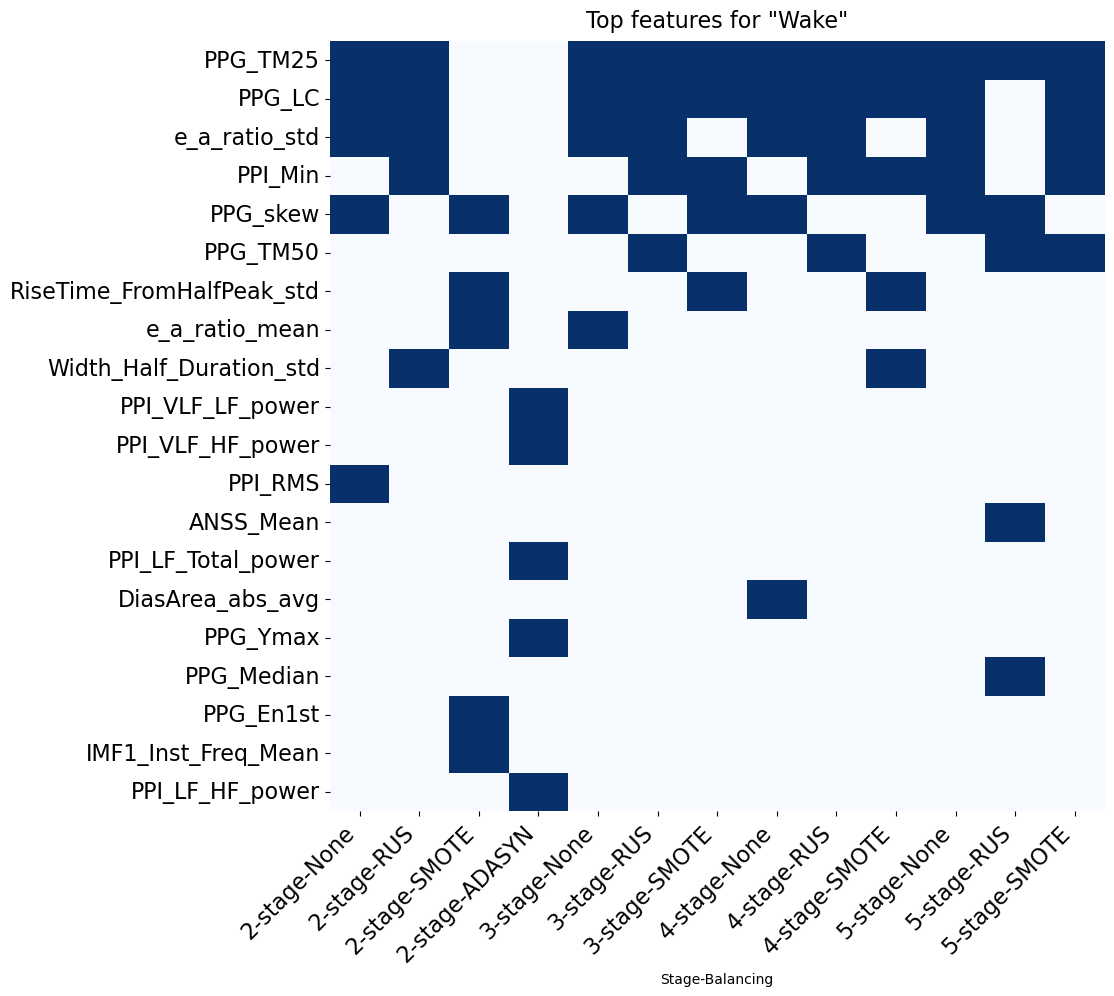

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List all stages and methods
stages = ['2-stage', '3-stage', '4-stage', '5-stage']
methods = ['None', 'RUS', 'SMOTE']

# Include ADASYN only for 2-stage
column_tuples = []
for stage in stages:
    for method in methods:
        column_tuples.append((stage, method))
    if stage == '2-stage':
        column_tuples.append((stage, 'ADASYN'))

# Create a multi-index for the columns
multi_index = pd.MultiIndex.from_tuples(column_tuples, names=["Stage", "Balancing"])

# Create a set to gather all features
all_features = set()
for features_list in features_by_stage_and_method.values():
    all_features.update(features_list)

# Convert the set to a sorted list to maintain order
all_features = sorted(all_features)

# Create the DataFrame with zeros
features_df = pd.DataFrame(0, index=all_features, columns=multi_index)

# Fill the DataFrame with 1s where the feature is important
for (stage, method), features in features_by_stage_and_method.items():
    for feature in features:
        if (stage, method) in features_df.columns:
            features_df.at[feature, (stage, method)] = 1

# Calculate the total importance for each feature across all stages and methods
features_df['Total Importance'] = features_df.sum(axis=1)

# Sort the DataFrame based on 'Total Importance'
features_df_sorted = features_df.sort_values(by='Total Importance', ascending=False)

# Plot the heatmap
plt.figure(figsize=(10, 10))  # Adjust the size accordingly
sns.heatmap(features_df_sorted.drop('Total Importance', axis=1), cmap='Blues', cbar=False)
plt.title('Top features for "Wake"', fontsize=16, pad = 10)
plt.xticks(rotation=45, ha='right', fontsize = 16)
plt.yticks(rotation=0, fontsize = 16)
plt.show()


# REM

In [65]:
features_by_stage_and_method = {
    ('3-stage', 'None'): ['e_a_ratio_mean', 'RiseTime_TimeBetweenSysPeaks_Mean', 'a_b_mean', 'b_a_ratio_mean', 'PPG_PerEn'],
    ('3-stage', 'RUS'): ['PPG_LC', 'PPG_Median', 'e_a_ratio_mean', 'DiasArea_abs_avg', 'RiseTime_TimeBetweenSysPeaks_Mean'],
    ('3-stage', 'SMOTE'): [' PPI_LF_HF_power', 'PPI_VLF_LF_power', 'PPI_LF_Total_power', 'PPI_VLF_HF_power', 'PPG_LC'],
    ('4-stage', 'None'): ['e_a_ratio_mean', 'a_b_mean', 'b_a_ratio_mean', 'RiseTime_TimeBetweenSysPeaks_Mean', 'PPG_PerEn'],
    ('4-stage', 'RUS'): ['PPG_TM50', 'PPG_LC', 'PPG_Median', 'a_b_std', 'DiasArea_abs_avg'],
    ('4-stage', 'SMOTE'): ['e_a_ratio_mean', 'PPG_En1st', 'b_a_ratio_mean', 'RiseTime_TimeBetweenSysPeaks_Mean', 'a_b_mean'],
    ('5-stage', 'None'): ['e_a_ratio_mean', 'RiseTime_TimeBetweenSysPeaks_Mean', 'DiasArea_abs_avg', 'PPG_PerEn', 'b_a_ratio_mean'],
    ('5-stage', 'RUS'): ['RiseTime_TimeBetweenSysPeaks_Mean', 'b_a_ratio_mean', 'PPG_PerEn', 'SysTime_avg', 'PPG_DWT_L4_Energy'],
    ('5-stage', 'SMOTE'): ['PPG_LC', 'RiseTime_TimeBetweenSysPeaks_Mean', 'IMF1_TP_Int_SD', 'b_a_ratio_mean', 'PPI_NN20']
}


In [66]:
all_features = set()
for features_list in features_by_stage_and_method.values():
    all_features.update(features_list)


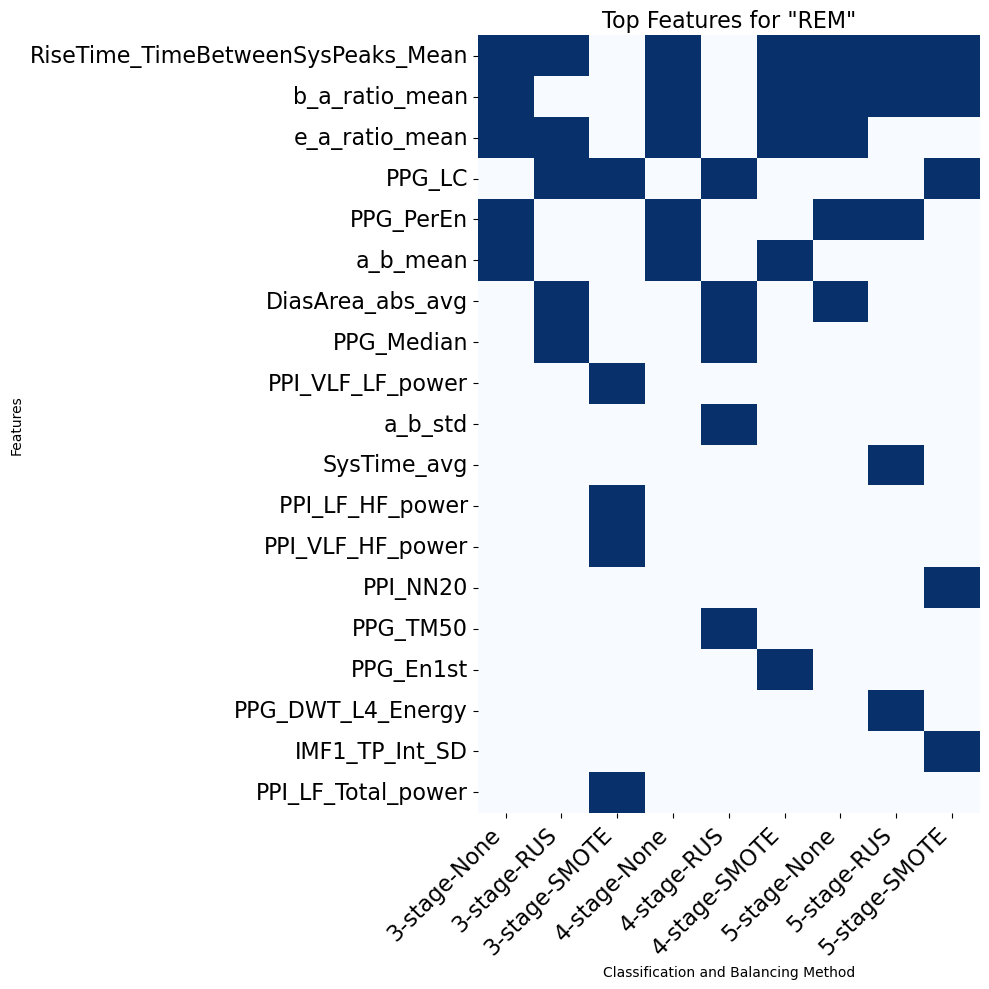

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List all stages and methods
stages = ['3-stage', '4-stage', '5-stage']
methods = ['None', 'RUS', 'SMOTE']

# Create a set to gather all features
all_features = set()
for features_list in features_by_stage_and_method.values():
    all_features.update(features_list)

# Convert the set to a sorted list to maintain order
all_features = sorted(all_features)

# Create a multi-index for the columns
column_tuples = [(stage, method) for stage in stages for method in methods]
multi_index = pd.MultiIndex.from_tuples(column_tuples, names=["Stage", "Balancing"])

# Create the DataFrame with zeros
features_df = pd.DataFrame(0, index=all_features, columns=multi_index)

# Fill the DataFrame with 1s where the feature is important
for (stage, method), features in features_by_stage_and_method.items():
    for feature in features:
        features_df.at[feature, (stage, method)] = 1

        # Calculate the total importance for each feature across all stages and methods
features_df['Total Importance'] = features_df.sum(axis=1)

# Sort the DataFrame based on 'Total Importance'
features_df_sorted = features_df.sort_values(by='Total Importance', ascending=False)

# Drop the 'Total Importance' column before plotting (if you want to exclude it from the heatmap)
features_df_sorted.drop('Total Importance', axis=1, inplace=True)

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(features_df_sorted, cmap='Blues', cbar=False, yticklabels=True)
plt.xlabel('Classification and Balancing Method')
plt.ylabel('Features')
plt.title('Top Features for "REM"', fontsize = 16)
plt.xticks(rotation=45, ha='right', fontsize = 16)
plt.yticks(rotation=0, fontsize = 16)
plt.tight_layout()
plt.show()


# Deep (N3)

In [68]:
features_by_stage_and_method = {
    
    ('4-stage', 'None'): ['e_a_ratio_mean', 'PPG_En1st', 'b_e_a_ratio_mean', 'a_b_mean', 'PPG_En2nd'],
    ('4-stage', 'RUS'): ['PPG_TM50', 'PPG_Q90', 'a_b_std', 'FallTime_Half_std', 'Width_Half_Duration_std'],
    ('4-stage', 'SMOTE'):  ['e_a_ratio_mean', 'PPG_En1st', 'PPG_En2nd', 'b_e_a_ratio_mean', 'FallTime_Half_avg'],
    ('5-stage', 'None'): ['e_a_ratio_mean', 'PPG_TM25', 'b_a_ratio_std', 'DiasArea_abs_avg', 'PPG_TM50'],
    ('5-stage', 'RUS'): ['b_e_a_ratio_mean', 'e_a_ratio_mean', 'PPI_IMF1_avgTe', 'FallTime_Half_avg', 'Width_10_Percent_Time_avg'],
    ('5-stage', 'SMOTE'): ['e_a_ratio_std', 'a_b_std', 'RiseTime_TimeBetweenSysPeaks_Mean', 'b_a_ratio_std']
}

all_features = set()
for features_list in features_by_stage_and_method.values():
    all_features.update(features_list)



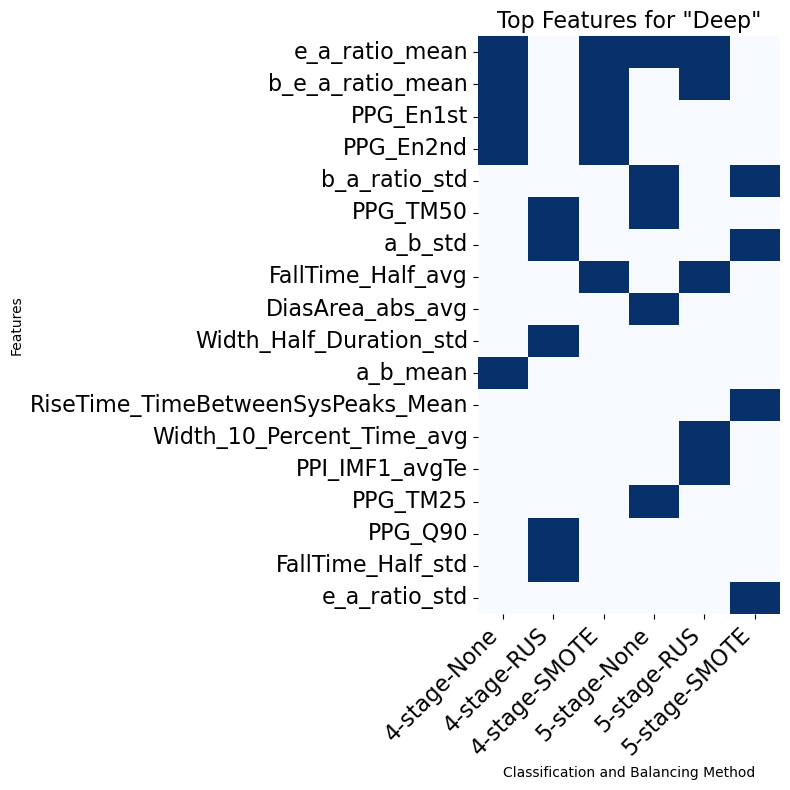

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List all stages and methods
stages = ['4-stage', '5-stage']
methods = ['None', 'RUS', 'SMOTE']

# Create a set to gather all features
all_features = set()
for features_list in features_by_stage_and_method.values():
    all_features.update(features_list)

# Convert the set to a sorted list to maintain order
all_features = sorted(all_features)

# Create a multi-index for the columns
column_tuples = [(stage, method) for stage in stages for method in methods]
multi_index = pd.MultiIndex.from_tuples(column_tuples, names=["Stage", "Balancing"])

# Create the DataFrame with zeros
features_df = pd.DataFrame(0, index=all_features, columns=multi_index)

# Fill the DataFrame with 1s where the feature is important
for (stage, method), features in features_by_stage_and_method.items():
    for feature in features:
        features_df.at[feature, (stage, method)] = 1

        # Calculate the total importance for each feature across all stages and methods
features_df['Total Importance'] = features_df.sum(axis=1)

# Sort the DataFrame based on 'Total Importance'
features_df_sorted = features_df.sort_values(by='Total Importance', ascending=False)

# Drop the 'Total Importance' column before plotting (if you want to exclude it from the heatmap)
features_df_sorted.drop('Total Importance', axis=1, inplace=True)

# Plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(features_df_sorted, cmap='Blues', cbar=False, yticklabels=True)
plt.xlabel('Classification and Balancing Method')
plt.ylabel('Features')
plt.title('Top Features for "Deep"', fontsize = 16)
plt.xticks(rotation=45, ha='right', fontsize = 16)
plt.yticks(rotation=0, fontsize = 16)
plt.tight_layout()
plt.show()


# NREM

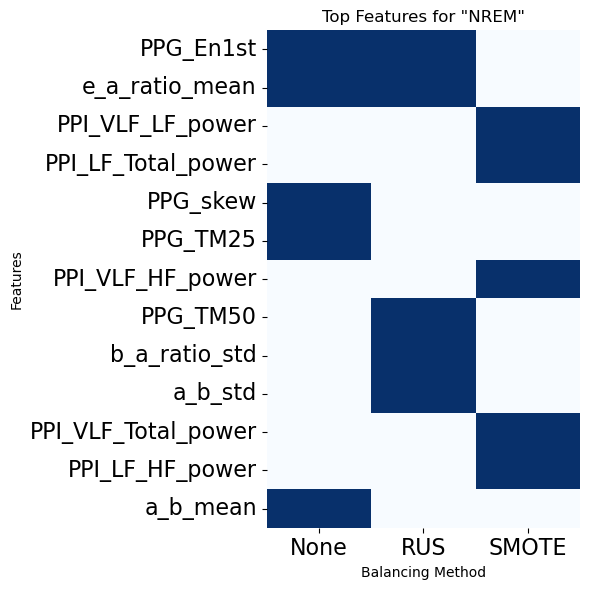

In [70]:
# Define the feature importance for each method as a list of features
features_none = ['e_a_ratio_mean', 'PPG_skew', 'PPG_TM25', 'a_b_mean', 'PPG_En1st']
features_rus = ['PPG_TM50', 'e_a_ratio_mean', 'a_b_std', 'PPG_En1st', 'b_a_ratio_std']
features_smote = ['PPI_LF_HF_power', 'PPI_VLF_LF_power', 'PPI_LF_Total_power', 'PPI_VLF_HF_power', 'PPI_VLF_Total_power']


# Create a DataFrame where each row corresponds to a feature and each column to a method
# Initialize with zeros
all_features = list(set(features_none + features_rus + features_smote))
methods = ['None', 'RUS', 'SMOTE']
features_df = pd.DataFrame(0, index=all_features, columns=methods)

# Fill the DataFrame with 1s where the feature is important for the method
for feature in features_none:
    features_df.at[feature, 'None'] = 1
for feature in features_smote:
    features_df.at[feature, 'SMOTE'] = 1
for feature in features_rus:
    features_df.at[feature, 'RUS'] = 1

# Count the total occurrences of each feature across all methods
features_df['Total'] = features_df.sum(axis=1)

# Sort the DataFrame based on the total count
features_df_sorted = features_df.sort_values('Total', ascending=False).drop('Total', axis=1)

# Plot the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(features_df_sorted, cmap='Blues', cbar=False, yticklabels=True)
plt.xlabel('Balancing Method')
plt.ylabel('Features')
plt.title('Top Features for "NREM"')
plt.xticks(fontsize = 16)
plt.yticks(rotation=0, fontsize = 16)
plt.tight_layout()
plt.show()


# Light

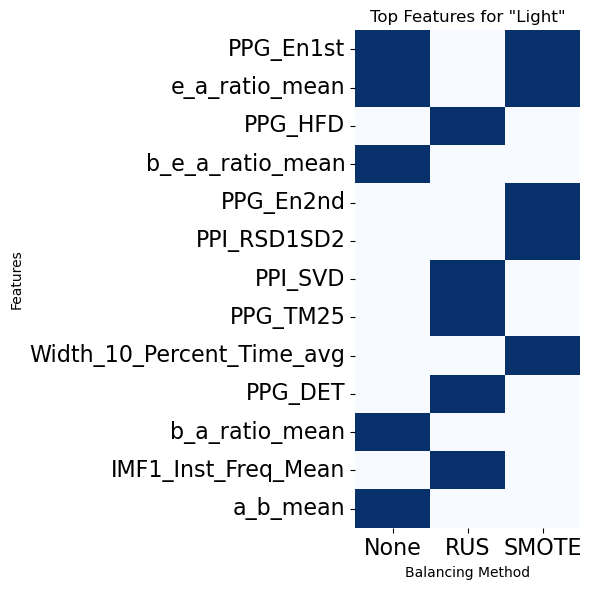

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the feature importance for each method as a list of features
features_none = ['e_a_ratio_mean', 'PPG_En1st', 'b_e_a_ratio_mean', 'a_b_mean', 'b_a_ratio_mean']
features_rus = ['PPG_TM25', 'PPG_DET', 'PPG_HFD', 'IMF1_Inst_Freq_Mean', 'PPI_SVD']
features_smote = ['e_a_ratio_mean', 'PPG_En1st', 'PPG_En2nd', 'Width_10_Percent_Time_avg', 'PPI_RSD1SD2']

# Create a DataFrame where each row corresponds to a feature and each column to a method
# Initialize with zeros
all_features = list(set(features_none + features_rus + features_smote))
methods = ['None', 'RUS', 'SMOTE']
features_df = pd.DataFrame(0, index=all_features, columns=methods)

# Fill the DataFrame with 1s where the feature is important for the method
for feature in features_none:
    features_df.at[feature, 'None'] = 1
for feature in features_smote:
    features_df.at[feature, 'SMOTE'] = 1
for feature in features_rus:
    features_df.at[feature, 'RUS'] = 1

# Count the total occurrences of each feature across all methods
features_df['Total'] = features_df.sum(axis=1)

# Sort the DataFrame based on the total count
features_df_sorted = features_df.sort_values('Total', ascending=False).drop('Total', axis=1)

# Plot the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(features_df_sorted, cmap='Blues', cbar=False, yticklabels=True)
plt.xlabel('Balancing Method')
plt.ylabel('Features')
plt.title('Top Features for "Light"')
plt.xticks(fontsize = 16)
plt.yticks(rotation=0, fontsize = 16)
plt.tight_layout()
plt.show()


# N2

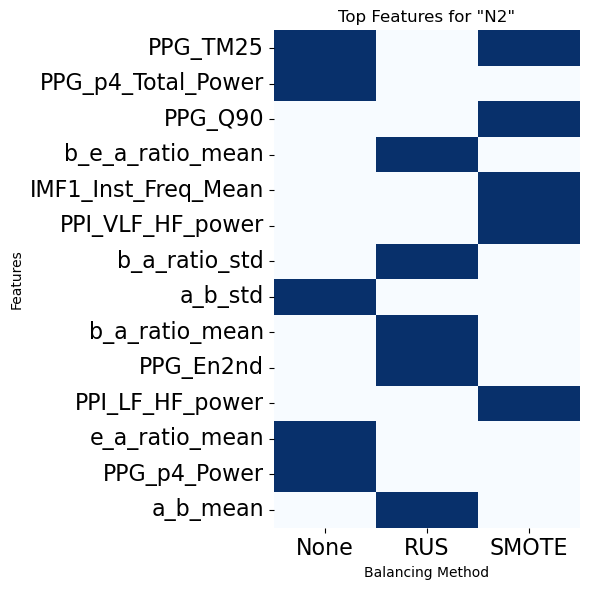

In [72]:
# Define the feature importance for each method as a list of features
features_none = ['e_a_ratio_mean', 'PPG_TM25', 'a_b_std', 'PPG_p4_Total_Power', 'PPG_p4_Power']
features_rus = ['b_a_ratio_mean', 'b_e_a_ratio_mean', 'b_a_ratio_std', 'a_b_mean', 'PPG_En2nd']
features_smote = ['PPI_VLF_HF_power', 'PPI_LF_HF_power', 'PPG_TM25', 'IMF1_Inst_Freq_Mean', 'PPG_Q90']



# Create a DataFrame where each row corresponds to a feature and each column to a method
# Initialize with zeros
all_features = list(set(features_none + features_rus + features_smote))
methods = ['None', 'RUS', 'SMOTE']
features_df = pd.DataFrame(0, index=all_features, columns=methods)

# Fill the DataFrame with 1s where the feature is important for the method
for feature in features_none:
    features_df.at[feature, 'None'] = 1
for feature in features_smote:
    features_df.at[feature, 'SMOTE'] = 1
for feature in features_rus:
    features_df.at[feature, 'RUS'] = 1

# Count the total occurrences of each feature across all methods
features_df['Total'] = features_df.sum(axis=1)

# Sort the DataFrame based on the total count
features_df_sorted = features_df.sort_values('Total', ascending=False).drop('Total', axis=1)

# Plot the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(features_df_sorted, cmap='Blues', cbar=False, yticklabels=True)
plt.xlabel('Balancing Method')
plt.ylabel('Features')
plt.title('Top Features for "N2"')
plt.xticks(fontsize = 16)
plt.yticks(rotation=0, fontsize = 16)
plt.tight_layout()
plt.show()

# N1

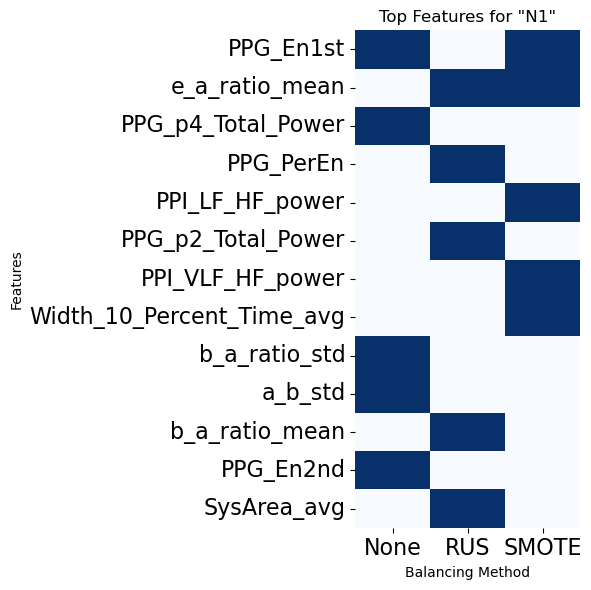

In [73]:
# Define the feature importance for each method as a list of features
features_none = ['a_b_std', 'PPG_p4_Total_Power', 'PPG_En1st', 'b_a_ratio_std', 'PPG_En2nd']
features_rus = ['b_a_ratio_mean', 'e_a_ratio_mean', 'SysArea_avg', 'PPG_PerEn', 'PPG_p2_Total_Power']
features_smote = ['PPI_VLF_HF_power', 'PPI_LF_HF_power', 'e_a_ratio_mean', 'PPG_En1st', 'Width_10_Percent_Time_avg']


# Create a DataFrame where each row corresponds to a feature and each column to a method
# Initialize with zeros
all_features = list(set(features_none + features_rus + features_smote))
methods = ['None', 'RUS', 'SMOTE']
features_df = pd.DataFrame(0, index=all_features, columns=methods)

# Fill the DataFrame with 1s where the feature is important for the method
for feature in features_none:
    features_df.at[feature, 'None'] = 1
for feature in features_smote:
    features_df.at[feature, 'SMOTE'] = 1
for feature in features_rus:
    features_df.at[feature, 'RUS'] = 1

# Count the total occurrences of each feature across all methods
features_df['Total'] = features_df.sum(axis=1)

# Sort the DataFrame based on the total count
features_df_sorted = features_df.sort_values('Total', ascending=False).drop('Total', axis=1)

# Plot the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(features_df_sorted, cmap='Blues', cbar=False, yticklabels=True)
plt.xlabel('Balancing Method')
plt.ylabel('Features')
plt.title('Top Features for "N1"')
plt.xticks(fontsize = 16)
plt.yticks(rotation=0, fontsize = 16)
plt.tight_layout()
plt.show()

In [74]:
df_subjects

SubjectID
0          ins1
1          ins1
2          ins1
3          ins1
4          ins1
...         ...
85537      sdb4
85538      sdb4
85539      sdb4
85540      sdb4
85541      sdb4

[85542 rows x 1 columns]

In [92]:
df_gender_age = pd.read_excel('/Users/karmenmarkov/Downloads/gender-age.xlsx')

In [87]:
# Getting unique values from the 'subject_id' column
unique_subjects = df_subjects['SubjectID'].unique()

# Print the unique subject IDs
unique_subjects

array(['ins1', 'ins2', 'ins5', 'ins6', 'ins7', 'ins8', 'ins9', 'n11',
       'n2', 'n3', 'n5', 'narco1', 'narco2', 'narco4', 'narco5', 'nfle10',
       'nfle11', 'nfle12', 'nfle13', 'nfle14', 'nfle16', 'nfle17',
       'nfle18', 'nfle19', 'nfle1', 'nfle20', 'nfle21', 'nfle22',
       'nfle23', 'nfle24', 'nfle25', 'nfle26', 'nfle27', 'nfle28',
       'nfle29', 'nfle2', 'nfle30', 'nfle31', 'nfle32', 'nfle33',
       'nfle34', 'nfle35', 'nfle36', 'nfle37', 'nfle38', 'nfle39',
       'nfle3', 'nfle40', 'nfle4', 'nfle5', 'nfle6', 'nfle7', 'nfle8',
       'nfle9', 'plm10', 'plm1', 'plm2', 'plm3', 'plm5', 'plm6', 'plm7',
       'plm8', 'plm9', 'rbd10', 'rbd11', 'rbd12', 'rbd13', 'rbd16',
       'rbd17', 'rbd18', 'rbd19', 'rbd20', 'rbd21', 'rbd22', 'rbd2',
       'rbd3', 'rbd4', 'rbd5', 'rbd7', 'rbd8', 'rbd9', 'sdb1', 'sdb2',
       'sdb4'], dtype=object)

In [80]:
df_gender_age

identification gender  age
0            NFLE8      M   14
1            NFLE1      F   16
2           NFLE37      M   16
3           NARCO3      F   18
4            NFLE4      M   18
..             ...    ...  ...
103           RBD2      M   77
104           SDB3      M   78
105           RBD3      M   81
106           INS3      M   82
107           RBD8      M   82

[108 rows x 3 columns]

In [93]:
df_gender_age['identification'] = df_gender_age['identification'].str.lower()
# If 'SUBJECT_ID' needs to be accessed in uppercase:
filtered_gender_age = df_gender_age[df_gender_age['identification'].isin(unique_subjects)]


In [94]:
filtered_gender_age

identification gender  age
2             ins1      M   54
3             ins2      F   58
6             ins5      F   59
7             ins6      F   54
8             ins7      F   47
..             ...    ...  ...
102           rbd9      M   76
103          rbd11      M   73
104           sdb1      M   65
105           sdb2      M   77
107           sdb4      M   65

[84 rows x 3 columns]

In [100]:
filtered_gender_age

identification gender  age
2             ins1      M   54
3             ins2      F   58
6             ins5      F   59
7             ins6      F   54
8             ins7      F   47
..             ...    ...  ...
102           rbd9      M   76
103          rbd11      M   73
104           sdb1      M   65
105           sdb2      M   77
107           sdb4      M   65

[84 rows x 3 columns]

In [101]:
# Extract root condition
filtered_gender_age['condition'] = filtered_gender_age['identification'].str.extract(r'([a-zA-Z]+)')

# Display updated DataFrame
filtered_gender_age

identification gender  age condition
2             ins1      M   54       ins
3             ins2      F   58       ins
6             ins5      F   59       ins
7             ins6      F   54       ins
8             ins7      F   47       ins
..             ...    ...  ...       ...
102           rbd9      M   76       rbd
103          rbd11      M   73       rbd
104           sdb1      M   65       sdb
105           sdb2      M   77       sdb
107           sdb4      M   65       sdb

[84 rows x 4 columns]

In [102]:
# Group by condition for overall statistics
overall_stats = filtered_gender_age.groupby('condition')['age'].agg(['mean', 'std', 'min', 'max', 'count']).reset_index()
overall_stats.columns = ['Condition', 'Age_Mean', 'Age_SD', 'Age_Min', 'Age_Max', 'Subject_Count']

# Group by condition and gender for detailed statistics
gender_stats = filtered_gender_age.groupby(['condition', 'gender'])['age'].agg(['mean', 'std', 'min', 'max', 'count']).reset_index()
gender_stats.columns = ['Condition', 'Gender', 'Age_Mean', 'Age_SD', 'Age_Min', 'Age_Max', 'Subject_Count']

# Display results
print("Overall Stats:")
print(overall_stats)

print("\nGender Specific Stats:")
print(gender_stats)


Overall Stats:
  Condition   Age_Mean     Age_SD  Age_Min  Age_Max  Subject_Count
0       ins  58.285714   8.014867       47       72              7
1         n  33.000000   3.366502       28       35              4
2     narco  35.000000  10.033278       24       44              4
3      nfle  30.307692  11.029038       14       67             39
4       plm  54.333333   6.633250       40       61              9
5       rbd  71.666667   6.173949       59       82             18
6       sdb  69.000000   6.928203       65       77              3

Gender Specific Stats:
   Condition Gender   Age_Mean     Age_SD  Age_Min  Age_Max  Subject_Count
0        ins      F  54.500000   5.446712       47       59              4
1        ins      M  63.333333   9.018500       54       72              3
2          n      F  32.666667   4.041452       28       35              3
3          n      M  34.000000        NaN       34       34              1
4      narco      F  36.500000  10.606602       29

In [103]:
# Format the age string with mean, std, and range
def format_age(row):
    mean, sd, min_age, max_age = row['Age_Mean'], row['Age_SD'], row['Age_Min'], row['Age_Max']
    if np.isnan(sd):  # If standard deviation is NaN, skip it in the formatting
        return f"{mean:.1f} ({min_age}-{max_age})"
    else:
        return f"{mean:.1f}±{sd:.1f} ({min_age}-{max_age})"

overall_stats['Age'] = overall_stats.apply(format_age, axis=1)
gender_stats['Age'] = gender_stats.apply(format_age, axis=1)

# Pivot gender_stats for merging
gender_pivot = gender_stats.pivot(index='Condition', columns='Gender', values='Age').reset_index()
gender_pivot.columns = ['Condition', 'Female_Age', 'Male_Age']  # Assuming only F and M are present

# Merge overall_stats with gender_pivot
final_df = pd.merge(overall_stats, gender_pivot, on='Condition', how='left')

# Select and rename columns for final output
final_df = final_df[['Condition', 'Subject_Count', 'Female_Age', 'Male_Age', 'Age']]
final_df.columns = ['Pathology distribution', 'Participants', 'Female Age', 'Male Age', 'Overall Age']


In [104]:
final_df

Pathology distribution  Participants         Female Age           Male Age  \
0                    ins             7   54.5±5.4 (47-59)   63.3±9.0 (54-72)   
1                      n             4   32.7±4.0 (28-35)       34.0 (34-34)   
2                  narco             4  36.5±10.6 (29-44)  33.5±13.4 (24-43)   
3                   nfle            39  33.2±13.2 (16-67)   27.8±8.3 (14-44)   
4                    plm             9   51.3±1.2 (50-52)   55.8±7.9 (40-61)   
5                    rbd            18   74.7±1.5 (73-76)   71.1±6.6 (59-82)   
6                    sdb             3                NaN   69.0±6.9 (65-77)   

         Overall Age  
0   58.3±8.0 (47-72)  
1   33.0±3.4 (28-35)  
2  35.0±10.0 (24-44)  
3  30.3±11.0 (14-67)  
4   54.3±6.6 (40-61)  
5   71.7±6.2 (59-82)  
6   69.0±6.9 (65-77)